In [1]:
library(mgcv)
library(caret)

Loading required package: nlme
This is mgcv 1.8-23. For overview type 'help("mgcv-package")'.
Loading required package: lattice
Loading required package: ggplot2


In [2]:
ROOT <- '/Users/dongmeichen/Documents/beetle'
DATA <- sprintf('%s/data', ROOT)
data <- read.csv(sprintf('%s/mpb10km_data_wo_FIA.csv', DATA))
head(data)

lon       lat      etopo1   beetleAcres host forest mStdAge   density  vcc
1 -124.1712 40.22942 365.1772   0.80      1    1       25.50000 58050.83 1  
2 -124.0860 40.42007 493.0852   0.80      0    1       42.46217 52809.04 1  
3 -123.9379 40.25447 487.5240   0.80      1    1      169.82977 54385.98 1  
4 -123.9535 40.34353 350.6961   0.80      0    1      249.11995 47005.25 1  
5 -124.2945 42.21193 387.5008   2.10      1    1      102.39621 51167.16 3  
6 -124.3114 42.30082 409.5534 331.05      1    1       83.12288 54697.57 3  
  mfri ⋯ Tmin     winterMin summerTmean Pmean    summerP1 minT      JanMin     
1 2    ⋯ 3.799283 -1.050936 13.39157    147.6052 24.63396 -1.142272  0.77218069
2 2    ⋯ 3.858750 -1.872970 14.15700    136.2772 25.59386 -1.986082 -0.02538966
3 2    ⋯ 3.853568 -2.322706 15.26891    131.7037 22.97331 -2.402099 -0.42077545
4 2    ⋯ 4.731104 -2.289419 15.96638    127.5623 21.96572 -2.376570 -0.38369531
5 2    ⋯ 3.569939 -1.609584 14.75741    144.9382 63.31930 -1.701227  0.26865842
6 2    ⋯ 2.772311 -1.861916 14.02822    145.8606 65.28476 -1.954968  0.04758294
  TOctSep  Jan20 PcumOctSep
1 10.28896 0     3588.627  
2 10.65948 0     3310.186  
3 11.30121 0     3203.155  
4 12.05334 0     3101.846  
5 10.65064 0     3508.975  
6  9.89128 0     3531.298

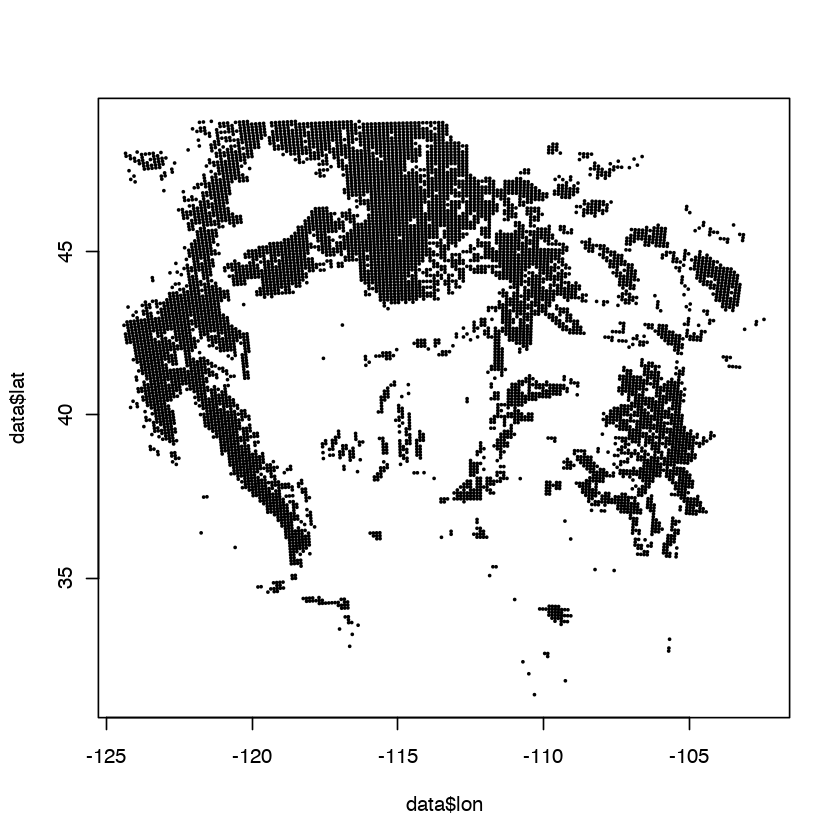

In [3]:
plot(data$lon, data$lat, pch=16, cex=0.3)

In [4]:
data_ctrl <- trainControl(method = "cv", number = 5)

In [5]:
ptm <- proc.time()
model_caret <- train(beetleAcres^0.05 ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) 
    + mStdAge + I(mStdAge^2) + density + I(density^2) + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2),   # model to fit
    data = data,                        
    trControl = data_ctrl, # folds
    method = "lmStepAIC",  # specifying regression model
    na.action = na.pass)
proc.time() - ptm

Start:  AIC=-28025.51
.outcome ~ lon + `I(lon^2)` + lat + `I(lat^2)` + etopo1 + `I(etopo1^2)` + 
    mStdAge + `I(mStdAge^2)` + density + `I(density^2)` + vcc + 
    `log(vcc)` + mfri + `log(mfri)` + prs + `I(prs^2)` + pms + 
    pls + GAP1 + GAP2 + GAP3 + vpd + `I(vpd^2)` + cwd + `I(cwd^2)` + 
    maxAugT + `I(maxAugT^2)` + `I(summerP0^2)` + summerP0 + Tmean + 
    `I(Tmean^2)` + `exp(Tmean)` + mi + `I(mi^2)` + Tvar + `I(Tvar^2)` + 
    wd + `I(wd^2)` + AugTmean + `I(AugTmean^2)` + OctTmin + `I(OctTmin^2)` + 
    AugMaxT + `I(AugMaxT^2)` + AugTmax + Acs + `I(Acs^2)` + MarMin + 
    ddAugJun + `I(ddAugJun^2)` + ddAugJul + `I(ddAugJul^2)` + 
    JanTmin + PPT + `I(PPT^2)` + summerP2 + `I(summerP2^2)` + 
    TMarAug + `exp(TMarAug)` + Mar20 + `log(Mar20 + 1)` + fallTmean + 
    `exp(fallTmean)` + MarTmin + maxT + `I(maxT^2)` + Tmin + 
    winterMin + summerTmean + Pmean + `I(Pmean^2)` + summerP1 + 
    `I(summerP1^2)` + minT + JanMin + `I(JanMin^2)` + TOctSep + 
    `exp(TOctSep)` + Jan2

   user  system elapsed 
330.328  15.459 385.635 

In [6]:
model_caret

Linear Regression with Stepwise Selection 

7636 samples
  47 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 6109, 6108, 6110, 6109, 6108 
Resampling results:

  RMSE       Rsquared   MAE       
  0.1017057  0.4938099  0.08105915


In [7]:
model_caret$finalModel


Call:
lm(formula = .outcome ~ lon + `I(lon^2)` + lat + `I(lat^2)` + 
    etopo1 + `I(etopo1^2)` + mStdAge + `I(mStdAge^2)` + density + 
    `I(density^2)` + `log(vcc)` + mfri + `log(mfri)` + prs + 
    `I(prs^2)` + GAP1 + GAP3 + vpd + `I(vpd^2)` + cwd + `I(cwd^2)` + 
    `I(maxAugT^2)` + `I(summerP0^2)` + summerP0 + Tmean + `I(Tmean^2)` + 
    `exp(Tmean)` + mi + `I(mi^2)` + Tvar + `I(Tvar^2)` + wd + 
    `I(wd^2)` + AugTmean + OctTmin + `I(OctTmin^2)` + `I(AugMaxT^2)` + 
    AugTmax + Acs + `I(Acs^2)` + MarMin + ddAugJun + `I(ddAugJun^2)` + 
    ddAugJul + `I(ddAugJul^2)` + PPT + `I(PPT^2)` + summerP2 + 
    `I(summerP2^2)` + TMarAug + `exp(TMarAug)` + Mar20 + `log(Mar20 + 1)` + 
    fallTmean + `exp(fallTmean)` + MarTmin + maxT + Tmin + winterMin + 
    summerTmean + Pmean + `I(Pmean^2)` + `I(summerP1^2)` + minT + 
    `I(JanMin^2)` + TOctSep + Jan20 + `I(Jan20^2)` + PcumOctSep + 
    `I(PcumOctSep^2)`, data = dat)

Coefficients:
      (Intercept)                lon         `I(lon^2

In [8]:
model_caret$resample

RMSE       Rsquared  MAE        Resample
1 0.10321793 0.4912458 0.08206755 Fold1   
2 0.09862915 0.5242641 0.07828606 Fold2   
3 0.10201898 0.4828618 0.08133429 Fold3   
4 0.10249058 0.4827639 0.08220479 Fold4   
5 0.10217166 0.4879140 0.08140308 Fold5

In [9]:
sd(model_caret$resample$Rsquared)

[1] 0.01739734

In [10]:
summary(model_caret$finalModel)


Call:
lm(formula = .outcome ~ lon + `I(lon^2)` + lat + `I(lat^2)` + 
    etopo1 + `I(etopo1^2)` + mStdAge + `I(mStdAge^2)` + density + 
    `I(density^2)` + `log(vcc)` + mfri + `log(mfri)` + prs + 
    `I(prs^2)` + GAP1 + GAP3 + vpd + `I(vpd^2)` + cwd + `I(cwd^2)` + 
    `I(maxAugT^2)` + `I(summerP0^2)` + summerP0 + Tmean + `I(Tmean^2)` + 
    `exp(Tmean)` + mi + `I(mi^2)` + Tvar + `I(Tvar^2)` + wd + 
    `I(wd^2)` + AugTmean + OctTmin + `I(OctTmin^2)` + `I(AugMaxT^2)` + 
    AugTmax + Acs + `I(Acs^2)` + MarMin + ddAugJun + `I(ddAugJun^2)` + 
    ddAugJul + `I(ddAugJul^2)` + PPT + `I(PPT^2)` + summerP2 + 
    `I(summerP2^2)` + TMarAug + `exp(TMarAug)` + Mar20 + `log(Mar20 + 1)` + 
    fallTmean + `exp(fallTmean)` + MarTmin + maxT + Tmin + winterMin + 
    summerTmean + Pmean + `I(Pmean^2)` + `I(summerP1^2)` + minT + 
    `I(JanMin^2)` + TOctSep + Jan20 + `I(Jan20^2)` + PcumOctSep + 
    `I(PcumOctSep^2)`, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38152 -

In [11]:
mod <- lm(
    beetleAcres^0.05 ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + 
    I(prs^2) + GAP1 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + 
    I(maxAugT^2) + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + 
    exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) + wd + 
    I(wd^2) + AugTmean + OctTmin + I(OctTmin^2) + I(AugMaxT^2) + 
    AugTmax + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + 
    ddAugJul + I(ddAugJul^2) + PPT + I(PPT^2) + summerP2 + 
    I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + 
    fallTmean + exp(fallTmean) + MarTmin + maxT + Tmin + winterMin + 
    summerTmean + Pmean + I(Pmean^2) + I(summerP1^2) + minT + 
    I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + PcumOctSep + 
    I(PcumOctSep^2), data=data)
summary(mod)


Call:
lm(formula = beetleAcres^0.05 ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + 
    MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    maxT + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + 
    PcumOctSep + I(PcumOctSep^2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38152 -0.06573  0.00487  0.07039  0.49218 

Coefficients:
         

In [12]:
cof.vars <- rownames(summary(mod)$coefficients)
cof.vars
vars <- cof.vars[!(cof.vars %in% grep('(exp|I|log)', cof.vars, value=T))]
vars
exps <- grep('exp', cof.vars, value=TRUE)
exps
exp_terms <- gsub("[()]", "", gsub('exp', "", exps))
exp_terms
sqs <- grep('I()', cof.vars, value=TRUE)[-1]
sqs
sq_terms <- gsub('I\\(', '',gsub('\\^2)', '', sqs))
sq_terms
logs <- grep('log', cof.vars, value=TRUE)
logs
log_terms <- gsub("[()]", "", gsub('log', "", logs[1:2]))
log_terms
logp1_terms <- gsub("[[:blank:]]", "", gsub("log\\(", "", gsub('\\+ 1)', "", logs[3])))
logp1_terms

[1] "(Intercept)"     "lon"             "I(lon^2)"        "lat"            
 [5] "I(lat^2)"        "etopo1"          "I(etopo1^2)"     "mStdAge"        
 [9] "I(mStdAge^2)"    "density"         "I(density^2)"    "log(vcc)"       
[13] "mfri"            "log(mfri)"       "prs"             "I(prs^2)"       
[17] "GAP1"            "GAP3"            "vpd"             "I(vpd^2)"       
[21] "cwd"             "I(cwd^2)"        "I(maxAugT^2)"    "I(summerP0^2)"  
[25] "summerP0"        "Tmean"           "I(Tmean^2)"      "exp(Tmean)"     
[29] "mi"              "I(mi^2)"         "Tvar"            "I(Tvar^2)"      
[33] "wd"              "I(wd^2)"         "AugTmean"        "OctTmin"        
[37] "I(OctTmin^2)"    "I(AugMaxT^2)"    "AugTmax"         "Acs"            
[41] "I(Acs^2)"        "MarMin"          "ddAugJun"        "I(ddAugJun^2)"  
[45] "ddAugJul"        "I(ddAugJul^2)"   "PPT"             "I(PPT^2)"       
[49] "summerP2"        "I(summerP2^2)"   "TMarAug"         "exp(TMarAug)"   
[53] "Mar20"           "log(Mar20 + 1)"  "fallTmean"       "exp(fallTmean)" 
[57] "MarTmin"         "maxT"            "Tmin"            "winterMin"      
[61] "summerTmean"     "Pmean"           "I(Pmean^2)"      "I(summerP1^2)"  
[65] "minT"            "I(JanMin^2)"     "TOctSep"         "Jan20"          
[69] "I(Jan20^2)"      "PcumOctSep"      "I(PcumOctSep^2)"

[1] "lon"         "lat"         "etopo1"      "mStdAge"     "density"    
 [6] "mfri"        "prs"         "GAP1"        "GAP3"        "vpd"        
[11] "cwd"         "summerP0"    "Tmean"       "mi"          "Tvar"       
[16] "wd"          "AugTmean"    "OctTmin"     "AugTmax"     "Acs"        
[21] "MarMin"      "ddAugJun"    "ddAugJul"    "PPT"         "summerP2"   
[26] "TMarAug"     "Mar20"       "fallTmean"   "MarTmin"     "maxT"       
[31] "Tmin"        "winterMin"   "summerTmean" "Pmean"       "minT"       
[36] "TOctSep"     "Jan20"       "PcumOctSep"

[1] "exp(Tmean)"     "exp(TMarAug)"   "exp(fallTmean)"

[1] "Tmean"     "TMarAug"   "fallTmean"

[1] "I(lon^2)"        "I(lat^2)"        "I(etopo1^2)"     "I(mStdAge^2)"   
 [5] "I(density^2)"    "I(prs^2)"        "I(vpd^2)"        "I(cwd^2)"       
 [9] "I(maxAugT^2)"    "I(summerP0^2)"   "I(Tmean^2)"      "I(mi^2)"        
[13] "I(Tvar^2)"       "I(wd^2)"         "I(OctTmin^2)"    "I(AugMaxT^2)"   
[17] "I(Acs^2)"        "I(ddAugJun^2)"   "I(ddAugJul^2)"   "I(PPT^2)"       
[21] "I(summerP2^2)"   "I(Pmean^2)"      "I(summerP1^2)"   "I(JanMin^2)"    
[25] "I(Jan20^2)"      "I(PcumOctSep^2)"

[1] "lon"        "lat"        "etopo1"     "mStdAge"    "density"   
 [6] "prs"        "vpd"        "cwd"        "maxAugT"    "summerP0"  
[11] "Tmean"      "mi"         "Tvar"       "wd"         "OctTmin"   
[16] "AugMaxT"    "Acs"        "ddAugJun"   "ddAugJul"   "PPT"       
[21] "summerP2"   "Pmean"      "summerP1"   "JanMin"     "Jan20"     
[26] "PcumOctSep"

[1] "log(vcc)"       "log(mfri)"      "log(Mar20 + 1)"

[1] "vcc"  "mfri"

[1] "Mar20"

In [13]:
for (v in c(vars, sqs, exps, logs)){
    cat(sprintf('%s + ', v))   
}

lon + lat + etopo1 + mStdAge + density + mfri + prs + GAP1 + GAP3 + vpd + cwd + summerP0 + Tmean + mi + Tvar + wd + AugTmean + OctTmin + AugTmax + Acs + MarMin + ddAugJun + ddAugJul + PPT + summerP2 + TMarAug + Mar20 + fallTmean + MarTmin + maxT + Tmin + winterMin + summerTmean + Pmean + minT + TOctSep + Jan20 + PcumOctSep + I(lon^2) + I(lat^2) + I(etopo1^2) + I(mStdAge^2) + I(density^2) + I(prs^2) + I(vpd^2) + I(cwd^2) + I(maxAugT^2) + I(summerP0^2) + I(Tmean^2) + I(mi^2) + I(Tvar^2) + I(wd^2) + I(OctTmin^2) + I(AugMaxT^2) + I(Acs^2) + I(ddAugJun^2) + I(ddAugJul^2) + I(PPT^2) + I(summerP2^2) + I(Pmean^2) + I(summerP1^2) + I(JanMin^2) + I(Jan20^2) + I(PcumOctSep^2) + exp(Tmean) + exp(TMarAug) + exp(fallTmean) + log(vcc) + log(mfri) + log(Mar20 + 1) + 

In [14]:
mod <- lm(
    beetleAcres^0.05 ~ lon + lat + etopo1 + mStdAge + density + mfri + prs + GAP1 + GAP3 + 
    vpd + cwd + summerP0 + Tmean + mi + Tvar + wd + AugTmean + OctTmin + AugTmax + Acs + 
    MarMin + ddAugJun + ddAugJul + PPT + summerP2 + TMarAug + Mar20 + fallTmean + MarTmin + 
    maxT + Tmin + winterMin + summerTmean + Pmean + minT + TOctSep + Jan20 + PcumOctSep + 
    I(lon^2) + I(lat^2) + I(etopo1^2) + I(mStdAge^2) + I(density^2) + I(prs^2) + I(vpd^2) + 
    I(cwd^2) + I(maxAugT^2) + I(summerP0^2) + I(Tmean^2) + I(mi^2) + I(Tvar^2) + I(wd^2) + 
    I(OctTmin^2) + I(AugMaxT^2) + I(Acs^2) + I(ddAugJun^2) + I(ddAugJul^2) + I(PPT^2) + 
    I(summerP2^2) + I(Pmean^2) + I(summerP1^2) + I(JanMin^2) + I(Jan20^2) + I(PcumOctSep^2) + 
    exp(Tmean) + exp(TMarAug) + exp(fallTmean) + log(vcc) + log(mfri) + log(Mar20 + 1), data=data)
summary(mod)


Call:
lm(formula = beetleAcres^0.05 ~ lon + lat + etopo1 + mStdAge + 
    density + mfri + prs + GAP1 + GAP3 + vpd + cwd + summerP0 + 
    Tmean + mi + Tvar + wd + AugTmean + OctTmin + AugTmax + Acs + 
    MarMin + ddAugJun + ddAugJul + PPT + summerP2 + TMarAug + 
    Mar20 + fallTmean + MarTmin + maxT + Tmin + winterMin + summerTmean + 
    Pmean + minT + TOctSep + Jan20 + PcumOctSep + I(lon^2) + 
    I(lat^2) + I(etopo1^2) + I(mStdAge^2) + I(density^2) + I(prs^2) + 
    I(vpd^2) + I(cwd^2) + I(maxAugT^2) + I(summerP0^2) + I(Tmean^2) + 
    I(mi^2) + I(Tvar^2) + I(wd^2) + I(OctTmin^2) + I(AugMaxT^2) + 
    I(Acs^2) + I(ddAugJun^2) + I(ddAugJul^2) + I(PPT^2) + I(summerP2^2) + 
    I(Pmean^2) + I(summerP1^2) + I(JanMin^2) + I(Jan20^2) + I(PcumOctSep^2) + 
    exp(Tmean) + exp(TMarAug) + exp(fallTmean) + log(vcc) + log(mfri) + 
    log(Mar20 + 1), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38152 -0.06573  0.00487  0.07039  0.49218 

Coefficients:
         

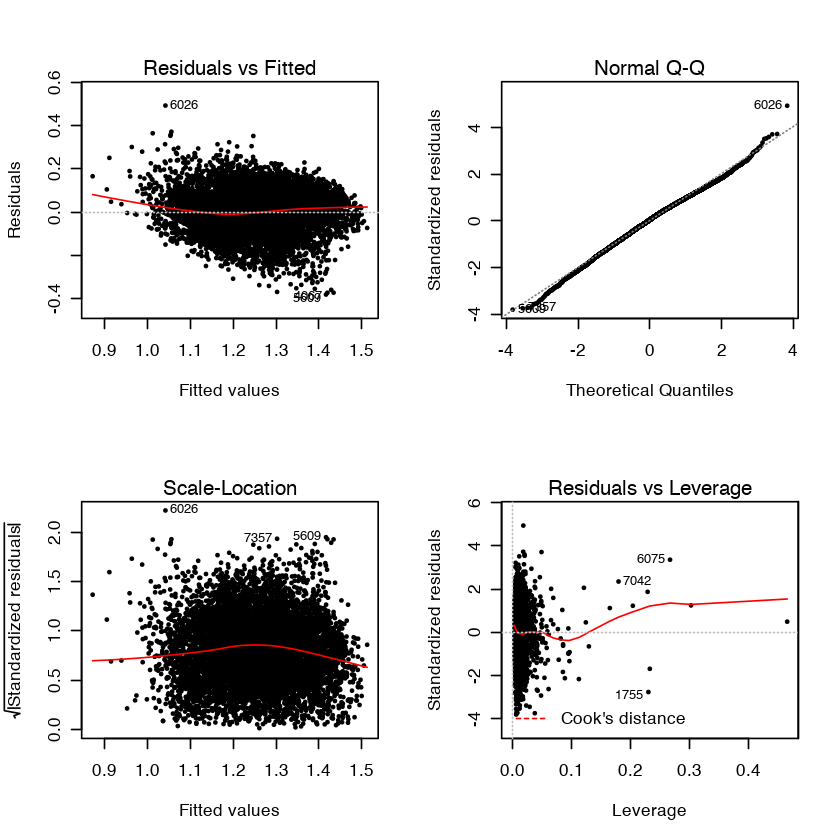

In [15]:
par(mfrow=c(2, 2))
plot(mod, cex=0.5, pch=16)

In [16]:
raw <- as.data.frame(summary(mod)$coefficients[,c(1,4)])
names(raw)[2] <- 'p1'
raw$s1 <- ifelse(raw$p1 < 0.001, "***", 
                 ifelse(raw$p1 < 0.01, "**",
                ifelse(raw$p1 < 0.05, "*", 
                ifelse(raw$p1 < 0.1, ".", 
                ""))))
head(raw)

Estimate     p1           s1 
(Intercept) 8.701820e-01 6.548083e-01    
lon         6.641650e-02 3.290617e-02 *  
lat         1.740475e-01 9.453611e-15 ***
etopo1      2.259205e-04 1.458408e-34 ***
mStdAge     2.319163e-04 1.507010e-05 ***
density     2.215952e-06 8.130738e-46 ***

In [17]:
data2 <- data
for(var in sq_terms){
    varnm <- paste0(var, '_sq')
    data2[,varnm] <- (data2[,var])^2
    cat(sprintf('Calculated %s in a squared term...\n', var))
}

for(var in exp_terms){
    varnm <- paste0(var, '_exp')
    data2[,varnm] <- exp(data2[,var])
    cat(sprintf('Calculated %s in a exponential term...\n', var))
}

for(var in log_terms){
    varnm <- paste0(var, '_log')
    data2[,varnm] <- log(data2[,var])
    cat(sprintf('Calculated %s in a logarithm term...\n', var))
}

for(var in logp1_terms){
    varnm <- paste0(var, '_logp1')
    data2[,varnm] <- log(data2[,var]+1)
    cat(sprintf('Calculated %s in a logarithm term...\n', var))
}

Calculated lon in a squared term...
Calculated lat in a squared term...
Calculated etopo1 in a squared term...
Calculated mStdAge in a squared term...
Calculated density in a squared term...
Calculated prs in a squared term...
Calculated vpd in a squared term...
Calculated cwd in a squared term...
Calculated maxAugT in a squared term...
Calculated summerP0 in a squared term...
Calculated Tmean in a squared term...
Calculated mi in a squared term...
Calculated Tvar in a squared term...
Calculated wd in a squared term...
Calculated OctTmin in a squared term...
Calculated AugMaxT in a squared term...
Calculated Acs in a squared term...
Calculated ddAugJun in a squared term...
Calculated ddAugJul in a squared term...
Calculated PPT in a squared term...
Calculated summerP2 in a squared term...
Calculated Pmean in a squared term...
Calculated summerP1 in a squared term...
Calculated JanMin in a squared term...
Calculated Jan20 in a squared term...
Calculated PcumOctSep in a squared term...
C

In [18]:
selected.vars <- c(vars, paste0(sq_terms, '_sq'), paste0(exp_terms, '_exp'), 
                   paste0(log_terms, '_log'), paste0(logp1_terms, '_logp1'))
predictors <- data2[ , (names(data2) %in% selected.vars)]
predictors <- scale(predictors)
df <- data.frame(beetleAcres=data2[,'beetleAcres'], predictors)
df$beetleAcres <- (df$beetleAcres)^0.05

In [19]:
mod2 <- lm(beetleAcres ~ ., data=df)

In [20]:
summary(mod2)


Call:
lm(formula = beetleAcres ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38152 -0.06573  0.00487  0.07039  0.49218 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     1.255548   0.001151 1090.429  < 2e-16 ***
lon             0.380766   0.178460    2.134  0.03291 *  
lat             0.626862   0.080760    7.762 9.45e-15 ***
etopo1          0.153836   0.012484   12.323  < 2e-16 ***
mStdAge         0.012204   0.002818    4.330 1.51e-05 ***
density         0.037791   0.002642   14.304  < 2e-16 ***
mfri            0.014678   0.005035    2.915  0.00356 ** 
prs             0.018627   0.007831    2.379  0.01740 *  
GAP1           -0.007195   0.001416   -5.081 3.84e-07 ***
GAP3            0.002969   0.001362    2.180  0.02926 *  
vpd            -0.124050   0.030692   -4.042 5.36e-05 ***
cwd            -0.045632   0.022143   -2.061  0.03935 *  
summerP0       -0.637672   0.288634   -2.209  0.02719 *  
Tmean          15.446

In [21]:
sort(abs(mod2$coefficients))

GAP3       vcc_log          GAP1    mStdAge_sq       mStdAge 
  0.002968800   0.003625195   0.007194923   0.010504483   0.012204138 
     mfri_log          mfri    density_sq           prs   TMarAug_exp 
  0.013614611   0.014677944   0.016530273   0.018627083   0.020860292 
       prs_sq    OctTmin_sq        MarMin        cwd_sq       density 
  0.022933472   0.032183288   0.032890661   0.036379494   0.037791257 
fallTmean_exp           cwd      Tmean_sq     Tmean_exp    maxAugT_sq 
  0.044449270   0.045632487   0.050586406   0.056127002   0.057981175 
          Acs        Acs_sq     JanMin_sq     etopo1_sq         Mar20 
  0.076264428   0.077780053   0.078078133   0.083384130   0.085323863 
        Jan20      Jan20_sq   Mar20_logp1        vpd_sq       MarTmin 
  0.091828879   0.097348358   0.104305336   0.110274878   0.113843616 
          vpd       AugTmax         wd_sq    AugMaxT_sq        etopo1 
  0.124049954   0.127108311   0.128316685   0.138378849   0.153836291 
      Tvar_sq          maxT         mi_sq          Tmin      AugTmean 
  0.157163376   0.195521589   0.198888002   0.239671264   0.242792778 
      OctTmin   summerTmean        PPT_sq           lon            wd 
  0.255517573   0.273104691   0.295807077   0.380766152   0.413616394 
    winterMin        lon_sq            mi          minT          Tvar 
  0.453849012   0.459223493   0.506765592   0.557731593   0.587073356 
     summerP2           lat      summerP0        lat_sq       TMarAug 
  0.624532719   0.626861791   0.637671904   0.691719180   0.766463494 
          PPT     fallTmean   (Intercept)         Pmean      ddAugJul 
  0.769053321   0.878872971   1.255548117   5.653125920   5.994200680 
     ddAugJun      Pmean_sq    PcumOctSep PcumOctSep_sq   summerP0_sq 
  6.040587226   6.513342949   6.569432374   6.930683284   9.470459651 
  summerP1_sq   ddAugJun_sq   ddAugJul_sq       TOctSep         Tmean 
  9.721174167  10.359097882  10.397311059  13.424245675  15.446930997 
  summerP2_sq 
 19.177120546

In [22]:
scaled <- as.data.frame(summary(mod2)$coefficients[,c(1,4)])
scaled

Estimate      Pr(>|t|)    
(Intercept)    1.255548117  0.000000e+00
lon            0.380766152  3.290617e-02
lat            0.626861791  9.453611e-15
etopo1         0.153836291  1.458408e-34
mStdAge        0.012204138  1.507010e-05
density        0.037791257  8.130738e-46
mfri           0.014677944  3.563006e-03
prs            0.018627083  1.740405e-02
GAP1          -0.007194923  3.840923e-07
GAP3           0.002968800  2.926311e-02
vpd           -0.124049954  5.356498e-05
cwd           -0.045632487  3.935143e-02
summerP0      -0.637671904  2.718555e-02
Tmean         15.446930997  2.450807e-12
mi             0.506765592  1.138829e-20
Tvar           0.587073356  1.054825e-09
wd            -0.413616394  9.313229e-20
AugTmean      -0.242792778  1.277005e-08
OctTmin        0.255517573  5.034225e-35
AugTmax        0.127108311  1.719837e-19
Acs            0.076264428  4.849661e-11
MarMin        -0.032890661  2.973904e-02
ddAugJun       6.040587226  1.371841e-02
ddAugJul      -5.994200680  1.431610e-02
PPT            0.769053321  7.074218e-06
summerP2       0.624532719  3.014954e-02
TMarAug       -0.766463494  1.439488e-09
Mar20         -0.085323863  8.505979e-12
fallTmean     -0.878872971  1.290336e-27
MarTmin        0.113843616  2.119440e-05
⋮             ⋮             ⋮           
etopo1_sq      -0.083384130 2.006370e-14
mStdAge_sq     -0.010504483 1.302236e-04
density_sq     -0.016530273 3.745349e-13
prs_sq         -0.022933472 1.731821e-03
vpd_sq          0.110274878 6.839223e-06
cwd_sq         -0.036379494 6.667011e-02
maxAugT_sq      0.057981175 2.196894e-36
summerP0_sq    -9.470459651 6.440114e-03
Tmean_sq       -0.050586406 1.021933e-03
mi_sq          -0.198888002 2.767652e-08
Tvar_sq        -0.157163376 6.457602e-11
wd_sq           0.128316685 6.776905e-07
OctTmin_sq      0.032183288 9.059924e-11
AugMaxT_sq      0.138378849 2.198259e-09
Acs_sq         -0.077780053 1.870780e-18
ddAugJun_sq   -10.359097882 9.272210e-02
ddAugJul_sq    10.397311059 9.135363e-02
PPT_sq         -0.295807077 1.018469e-01
summerP2_sq    19.177120546 5.975824e-03
Pmean_sq       -6.513342949 1.685341e-15
summerP1_sq    -9.721174167 5.577153e-03
JanMin_sq      -0.078078133 2.524848e-05
Jan20_sq        0.097348358 8.978715e-20
PcumOctSep_sq   6.930683284 5.480324e-13
Tmean_exp       0.056127002 1.139999e-02
TMarAug_exp    -0.020860292 1.584007e-02
fallTmean_exp  -0.044449270 2.481850e-03
vcc_log         0.003625195 4.945122e-03
mfri_log       -0.013614611 8.864008e-03
Mar20_logp1     0.104305336 2.118838e-12

In [24]:
names(scaled)[2] <- 'p2'
scaled$s2 <- ifelse(scaled$p2 < 0.001, "***", 
                 ifelse(scaled$p2 < 0.01, "**",
                ifelse(scaled$p2 < 0.05, "*", 
                ifelse(scaled$p2 < 0.1, ".", 
                ""))))
v <- data.frame(variable=rownames(scaled))
model3.table <- cbind(v, raw, scaled)
head(model3.table)

variable    Estimate     p1           s1  Estimate   p2          
(Intercept) (Intercept) 8.701820e-01 6.548083e-01     1.25554812 0.000000e+00
lon         lon         6.641650e-02 3.290617e-02 *   0.38076615 3.290617e-02
lat         lat         1.740475e-01 9.453611e-15 *** 0.62686179 9.453611e-15
etopo1      etopo1      2.259205e-04 1.458408e-34 *** 0.15383629 1.458408e-34
mStdAge     mStdAge     2.319163e-04 1.507010e-05 *** 0.01220414 1.507010e-05
density     density     2.215952e-06 8.130738e-46 *** 0.03779126 8.130738e-46
            s2 
(Intercept) ***
lon         *  
lat         ***
etopo1      ***
mStdAge     ***
density     ***

In [25]:
write.csv(model3.table, sprintf('%s/model3_table.csv', DATA), row.names=TRUE)

In [26]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps),]

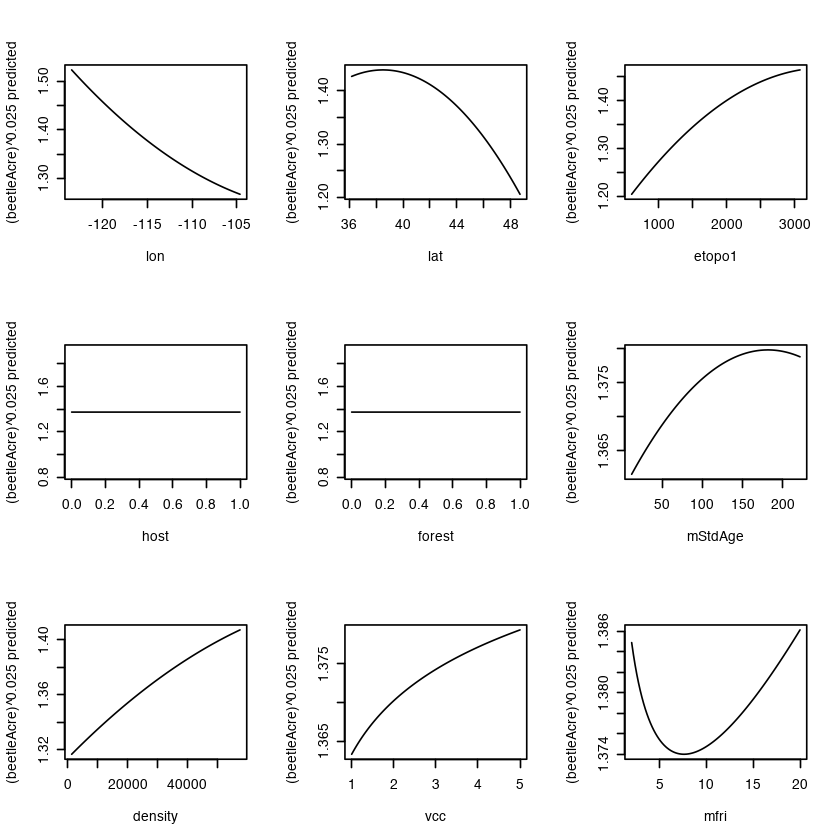

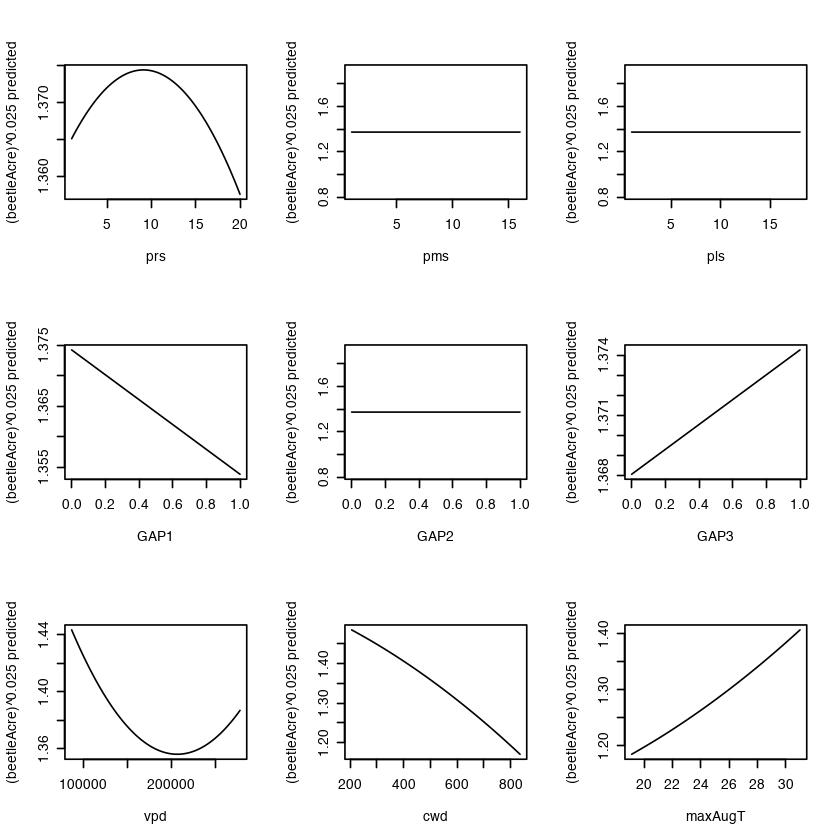

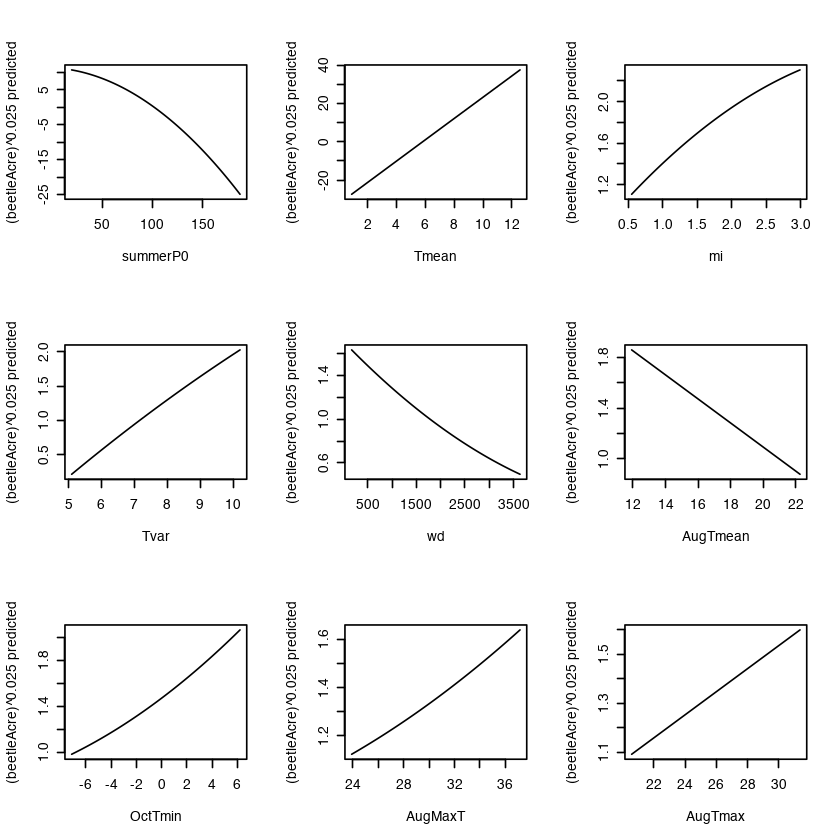

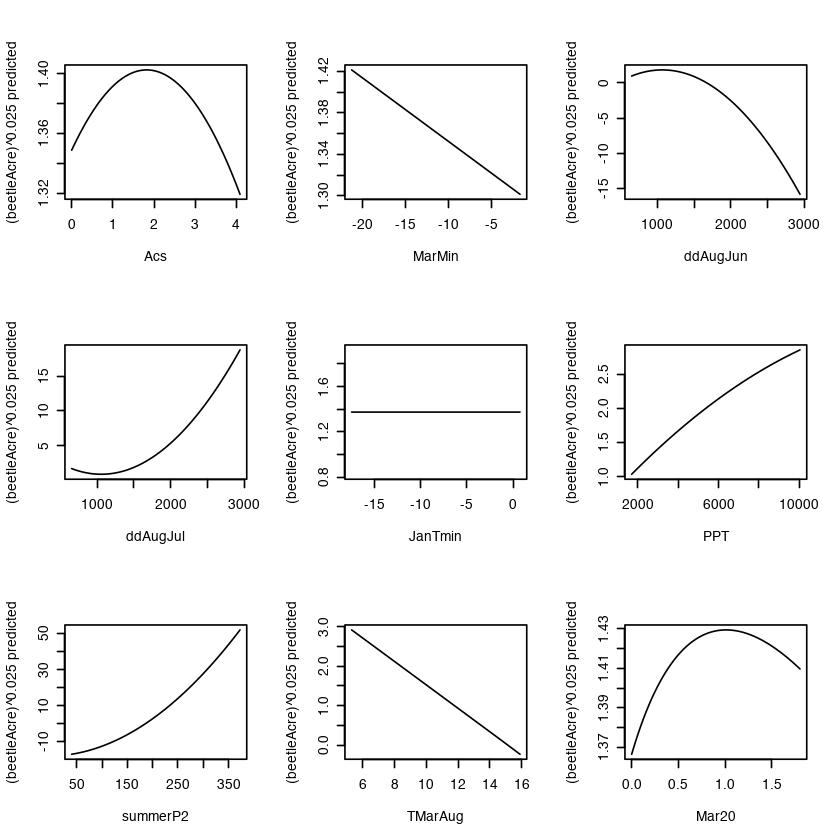

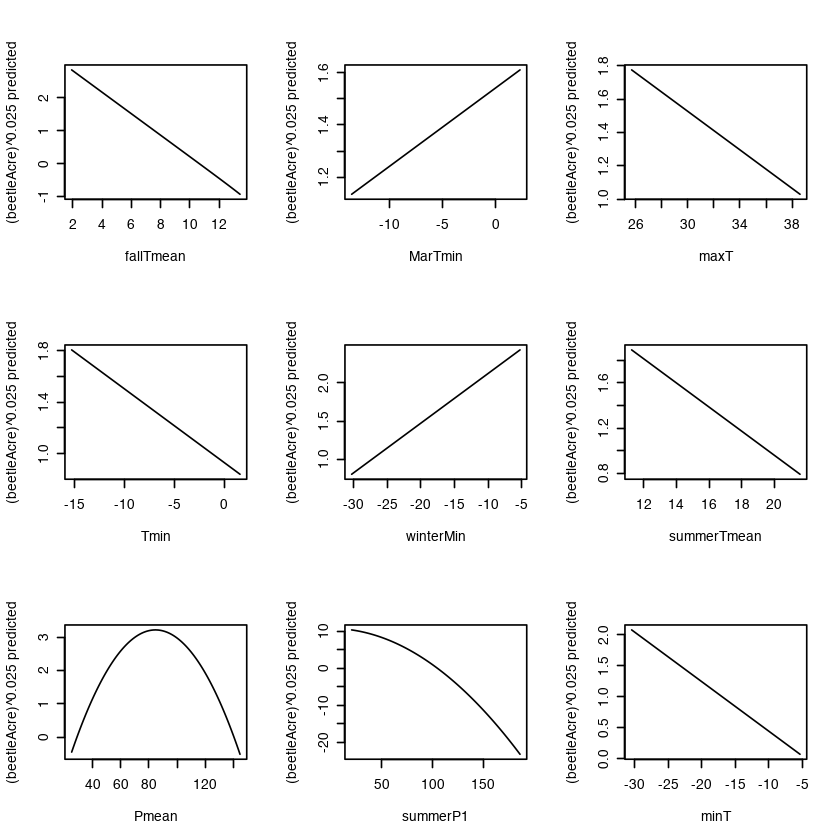

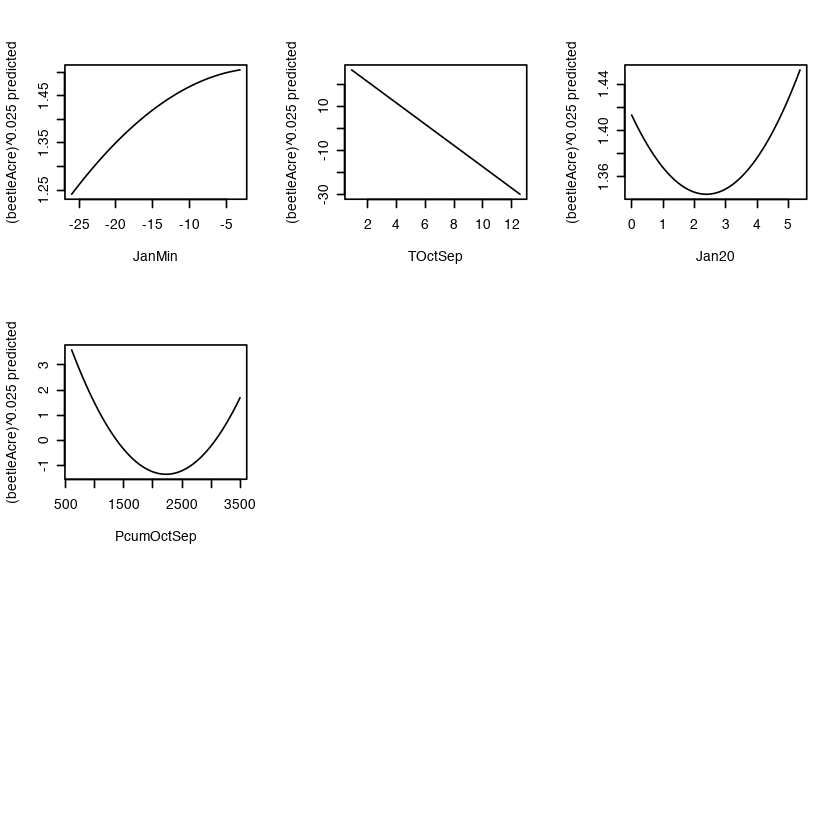

In [27]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='(beetleAcre)^0.025 predicted')
  }
}

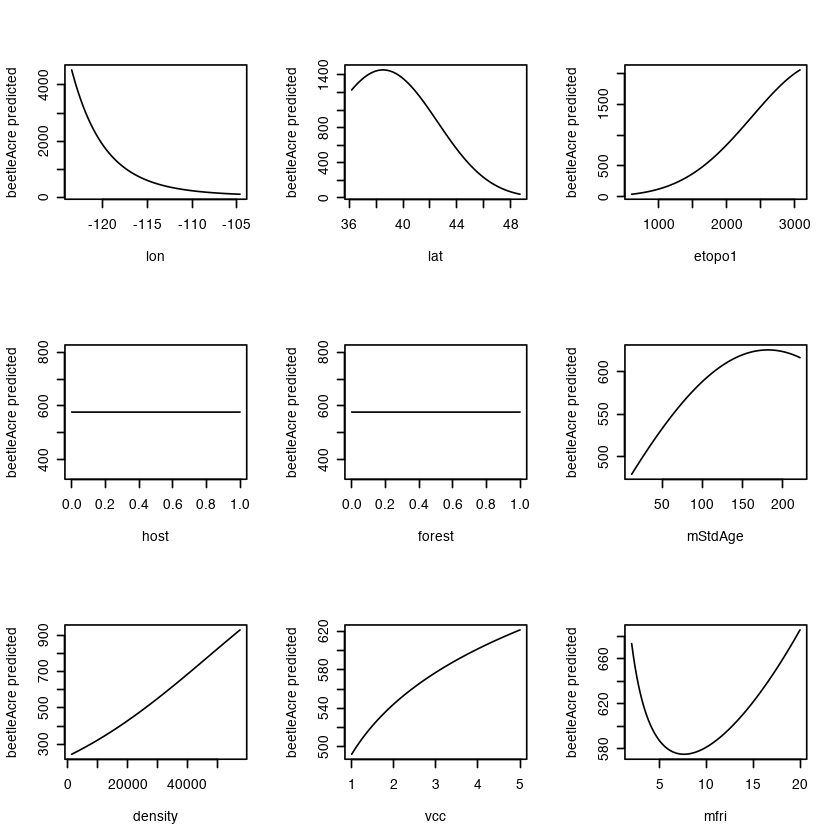

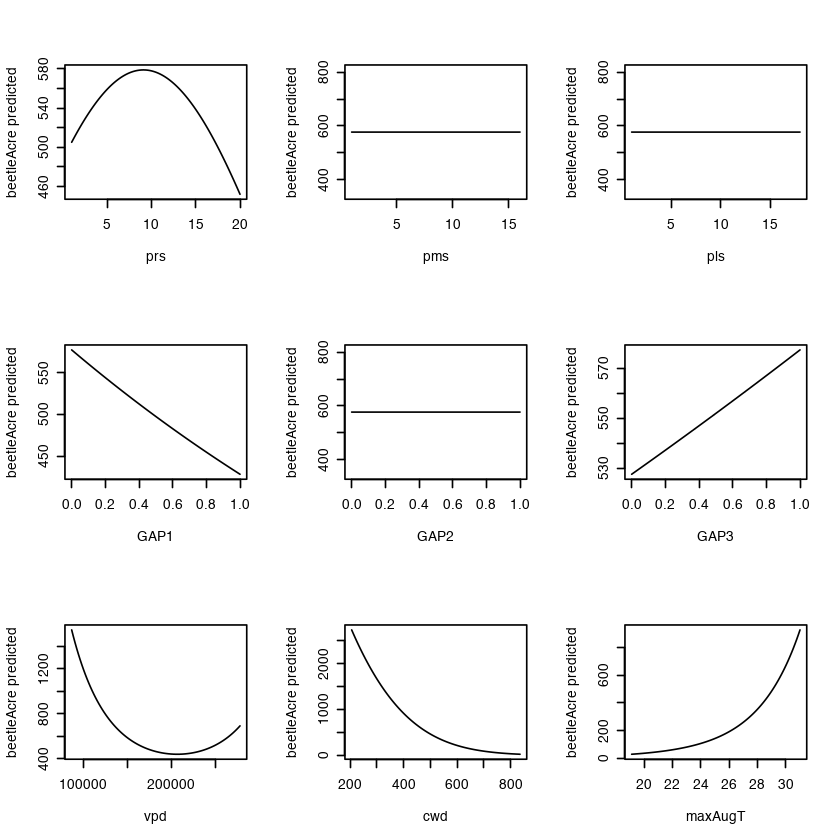

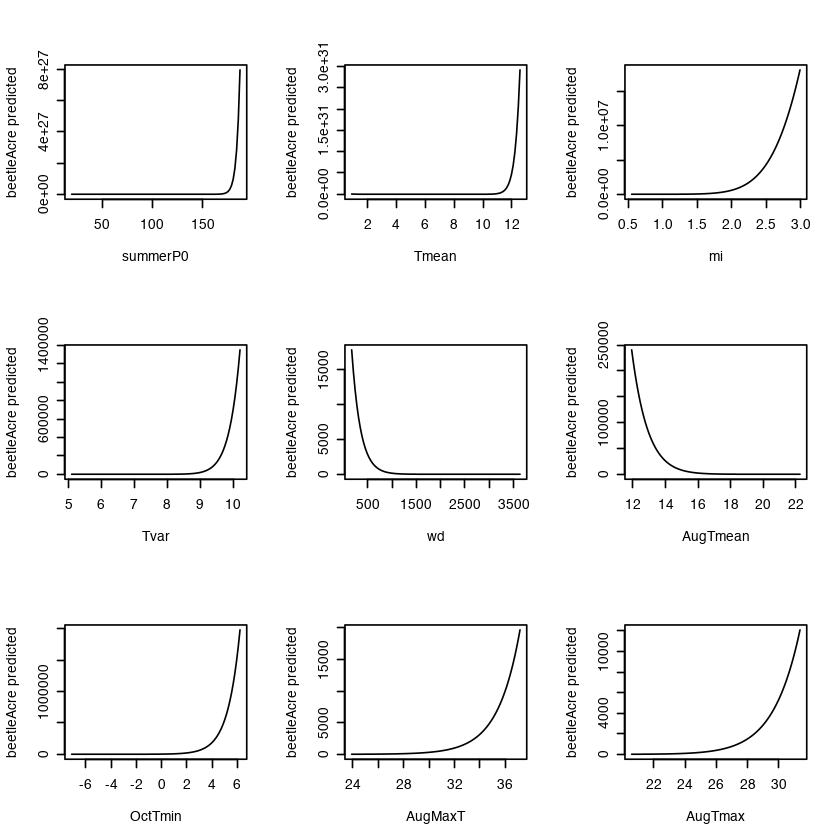

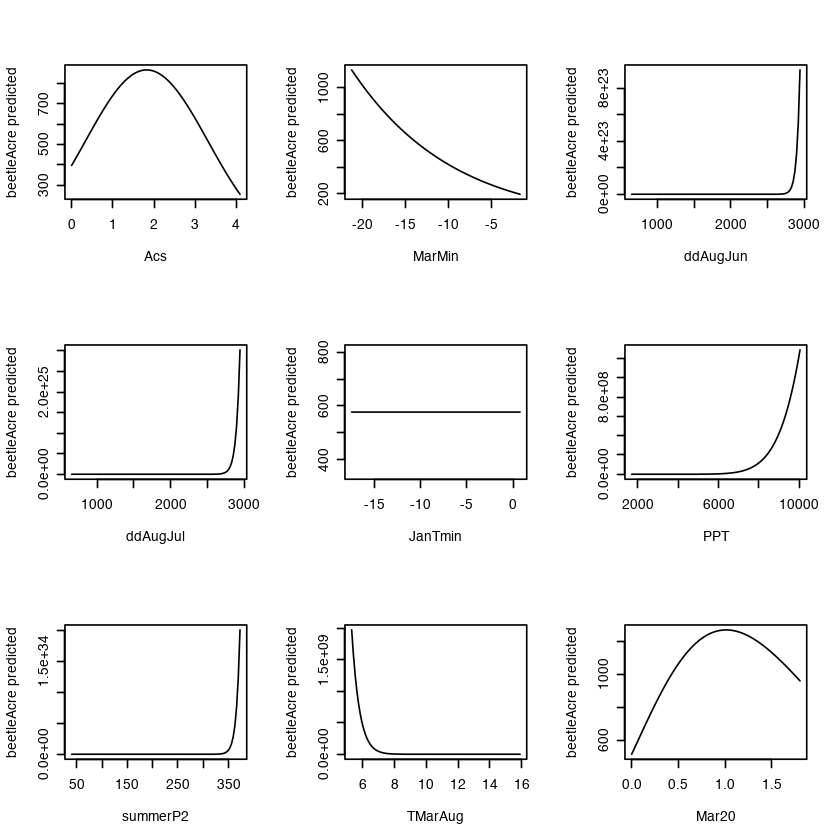

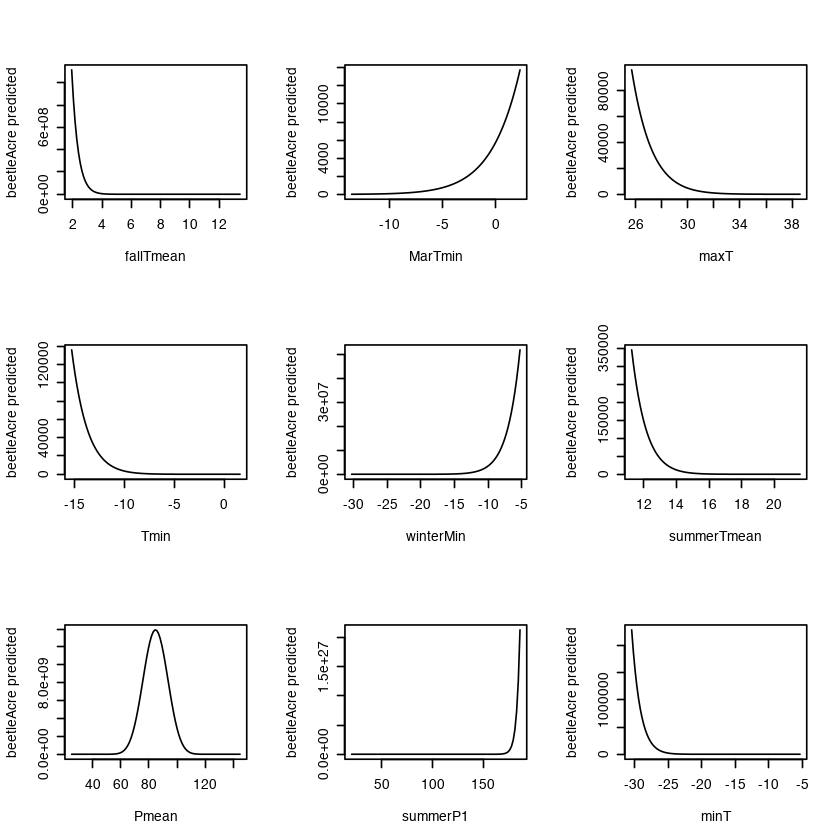

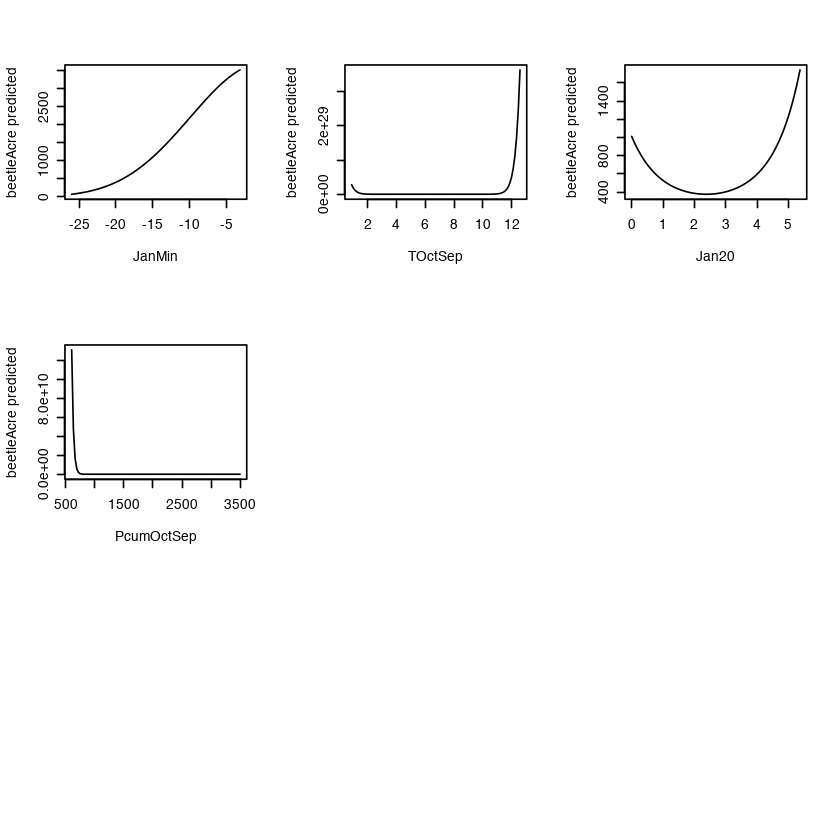

In [30]:
m <- data.frame(matrix(, nrow = 100, ncol = 18))
colnames(m) <- c('mStdAge', 'mStdAge.y', 'density', 'density.y', 'vcc', 'vcc.y', 
                 'mfri', 'mfri.y', 'prs', 'prs.y', 'GAP1', 'GAP1.y','GAP3', 'GAP3.y')
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- (predict(mod, newdata=test.df))^(1/0.05)
    i <- 1
    if(field %in% c('mStdAge', 'density', 'vcc', 'mfri', 'prs', 'GAP1', 'GAP3')){
        m[,field] <- test.df[, field]
        m[,paste0(field,'.y')] <- preds
        i <- i + 1
    }
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}
write.csv(m, sprintf('%s/plot_2D_forestdata.csv', DATA), row.names=FALSE)

In [3]:
cor.test(data$mStdAge, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$mStdAge and log(data$beetleAcres)
t = 7.8637, df = 7634, p-value = 4.241e-15
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.06734481 0.11184436
sample estimates:
       cor 
0.08963932 


In [4]:
cor.test(data$density, log(data$beetleAcres))


	Pearson's product-moment correlation

data:  data$density and log(data$beetleAcres)
t = 8.1751, df = 7634, p-value = 3.434e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.07087692 0.11534762
sample estimates:
       cor 
0.09315873 


In [5]:
# GAM iteration
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep),
    data=data) # GCV = 2.3865
proc.time() - ptm

   user  system elapsed 
 19.734   0.704  22.758 

In [6]:
summary(mod)


Family: gaussian 
Link function: identity 

Formula:
log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + 
    te(mStdAge) + te(density) + te(vcc) + te(mfri) + te(prs) + 
    te(pms) + te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + 
    te(maxAugT) + te(summerP0) + te(Tmean) + te(mi) + te(Tvar) + 
    te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + te(AugTmax) + 
    te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + te(summerP2) + te(TMarAug) + te(Mar20) + te(fallTmean) + 
    te(MarTmin) + te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + 
    te(Pmean) + te(summerP1) + te(minT) + te(JanMin) + te(TOctSep) + 
    te(Jan20) + te(PcumOctSep)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.98043    0.09378  42.446  < 2e-16 ***
host         0.32890    0.08831   3.724 0.000197 ***
forest       0.14679    0.04057   3.618 0.000299 ***
GAP1        -0.19059    0.06431  -2.963 0.003052 ** 

In [7]:
gam.table <- rbind(summary(mod)$p.table, summary(mod)$s.table)
rownames(gam.table[-1,][order(gam.table[-1,][,4], decreasing = TRUE),])[1]

[1] "te(summerP2)"

In [10]:
summary(mod)$sp.criterion # initial value: 2.3865351476502

GCV.Cp 
2.386538

In [9]:
# GAM iteration: te(summerP2)
ptm <- proc.time()
mod <- gam(
    log(beetleAcres) ~ te(lon) + te(lat) + te(etopo1) + host + forest + te(mStdAge) + 
    te(density) + te(vcc) + te(mfri) + te(prs) + te(pms) + 
    te(pls) + GAP1 + GAP2 + GAP3 + te(vpd) + te(cwd) + te(maxAugT) + te(summerP0) + 
    te(Tmean) + te(mi) + te(Tvar) + te(wd) + te(AugTmean) + te(OctTmin) + te(AugMaxT) + 
    te(AugTmax) + te(Acs) + te(MarMin) + te(ddAugJun) + te(ddAugJul) + te(JanTmin) + 
    te(PPT) + summerP2 + te(TMarAug) + te(Mar20) + te(fallTmean) + te(MarTmin) + 
    te(maxT) + te(Tmin) + te(winterMin) + te(summerTmean) + te(Pmean) + te(summerP1) + 
    te(minT) + te(JanMin) + te(TOctSep) + te(Jan20) + te(PcumOctSep),
    data=data) # GCV = 2.3865
proc.time() - ptm

   user  system elapsed 
 13.721   0.336  14.249 

In [20]:
bstar = NULL # Rows of bstar will be bootstrap vectors of regression coefficients.
n = dim(data)[1] 
B = 1000
ptm <- proc.time()
for(draw in 1:B){
  # Randomly sample from the rows, with replacement
  Dstar = data[sample(1:n,size=n,replace=T),]
  model <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + I(cwd^2) + 
    I(maxAugT^2) + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) + 
    wd + I(wd^2) + AugTmean + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + MarMin + 
    ddAugJun + ddAugJul + I(ddAugJul^2) + PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + I(maxT^2) + Tmin + winterMin + summerTmean + 
    Pmean + I(Pmean^2) + I(summerP1^2) + minT + JanMin + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + PcumOctSep + 
    I(PcumOctSep^2),
    data=Dstar)
  bstar = rbind( bstar,coef(model) )
  # print(draw)
} # Next draw
proc.time() - ptm

   user  system elapsed 
100.044  10.656 142.921 

In [21]:
bstar <- as.data.frame(bstar)
head(bstar)

(Intercept) lon       I(lon^2)    lat      I(lat^2)    etopo1     
1 -26.236299  0.8537563 0.004844241 2.804601 -0.03581349 0.003395995
2  10.444486  1.5415032 0.007699060 3.191117 -0.04068679 0.003916049
3   2.742819  1.1228823 0.005779197 2.723259 -0.03542151 0.003350912
4  41.691889  1.8161824 0.008603989 2.490899 -0.03170367 0.003352173
5  67.693462  2.5082259 0.012122987 2.815214 -0.03609127 0.003592821
6  39.487932  1.9288419 0.009586131 2.499743 -0.03252688 0.003615956
  I(etopo1^2)   mStdAge     I(mStdAge^2)  density      ⋯ I(Pmean^2) 
1 -4.273488e-07 0.003154578 -7.465163e-06 4.346586e-05 ⋯ -0.02004206
2 -6.153917e-07 0.004942371 -1.312393e-05 3.183351e-05 ⋯ -0.01915190
3 -4.924563e-07 0.006798592 -2.246375e-05 3.878264e-05 ⋯ -0.01992817
4 -4.776783e-07 0.003299808 -9.841620e-06 3.287905e-05 ⋯ -0.01471926
5 -4.804834e-07 0.003924880 -1.229815e-05 3.546068e-05 ⋯ -0.02111296
6 -4.712581e-07 0.002832075 -8.926863e-06 3.640123e-05 ⋯ -0.01765609
  I(summerP1^2) minT       JanMin     I(JanMin^2)  TOctSep   Jan20     
1 -0.01565878   -1.4793169 -0.1711063 -0.009621502 -56.64788 -0.7609995
2 -0.02020139   -1.1438109 -0.1924907 -0.010662815 -92.56040 -0.6407049
3 -0.01193221   -1.1557847 -0.1661198 -0.008417445 -76.81134 -0.9067200
4 -0.01187753   -0.7947165 -0.1862572 -0.006817503 -92.70980 -0.8228067
5 -0.02814165   -0.9413348 -0.3225595 -0.011528453 -98.57313 -0.6067276
6 -0.01538470   -1.2191838 -0.1997362 -0.012749040 -66.16343 -0.6850322
  I(Jan20^2) PcumOctSep I(PcumOctSep^2)
1 0.1726028  -0.1424960 3.750069e-05   
2 0.1723063  -0.1447114 3.608349e-05   
3 0.1880057  -0.1444426 3.655307e-05   
4 0.1584736  -0.1153153 2.674250e-05   
5 0.1564807  -0.1779315 3.911571e-05   
6 0.1665846  -0.1579768 3.224579e-05

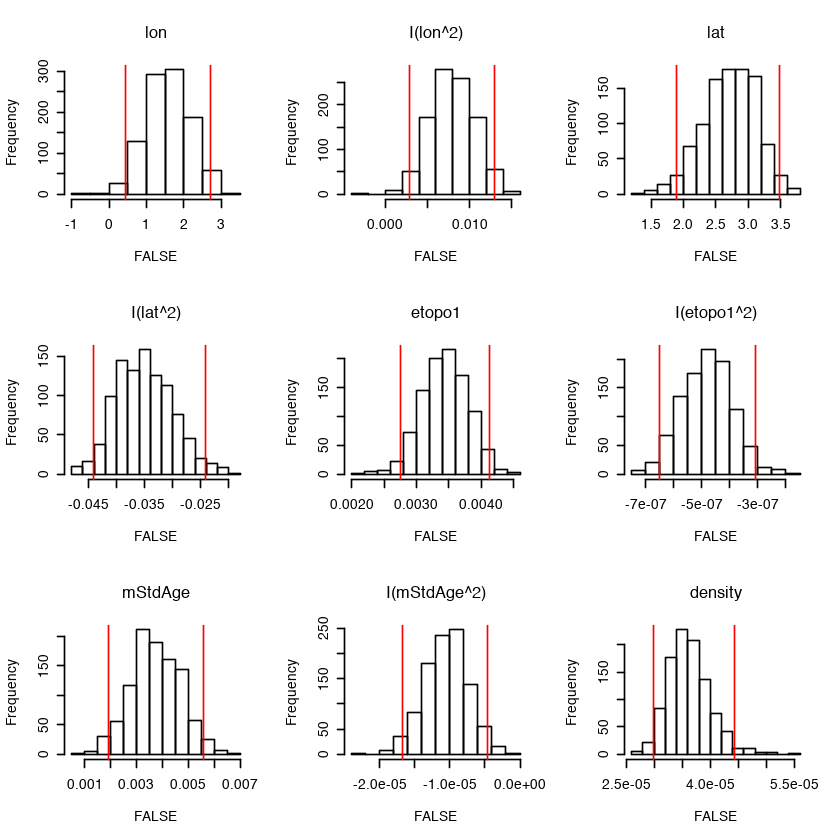

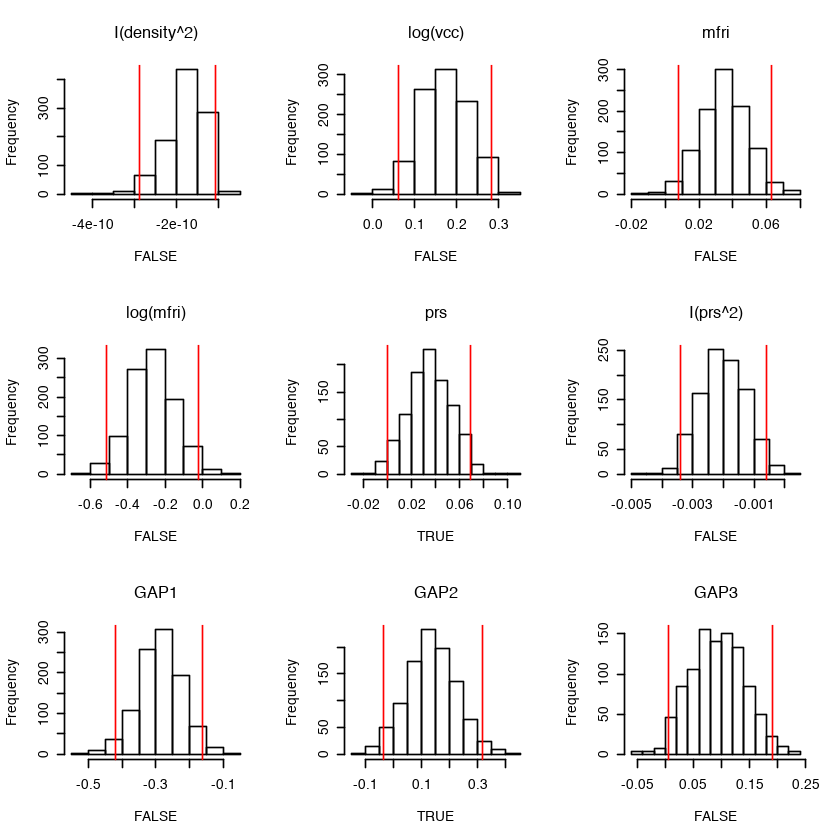

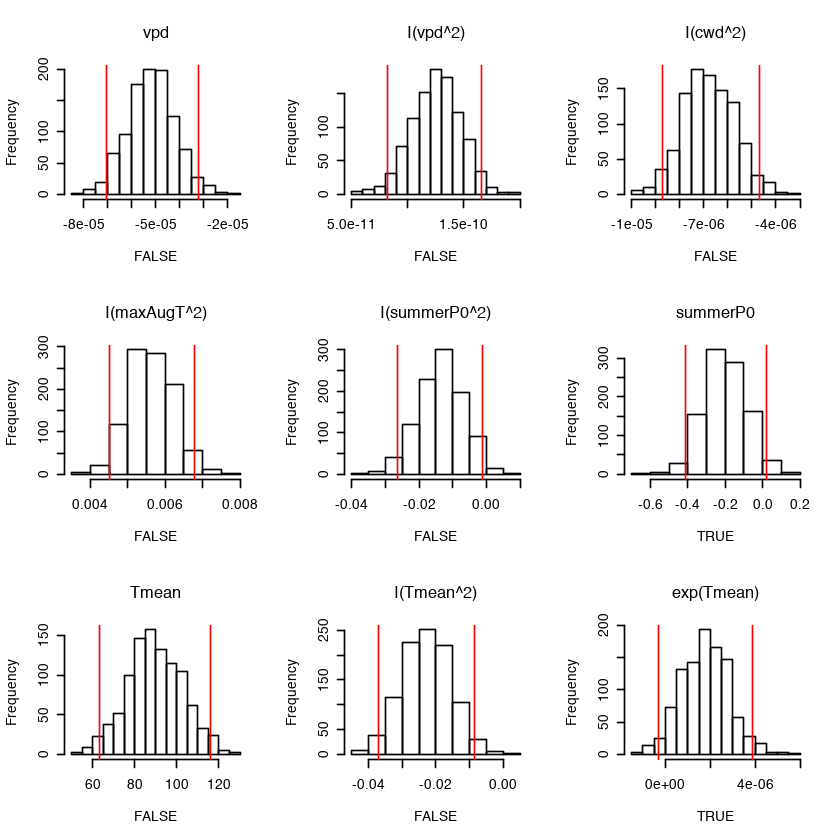

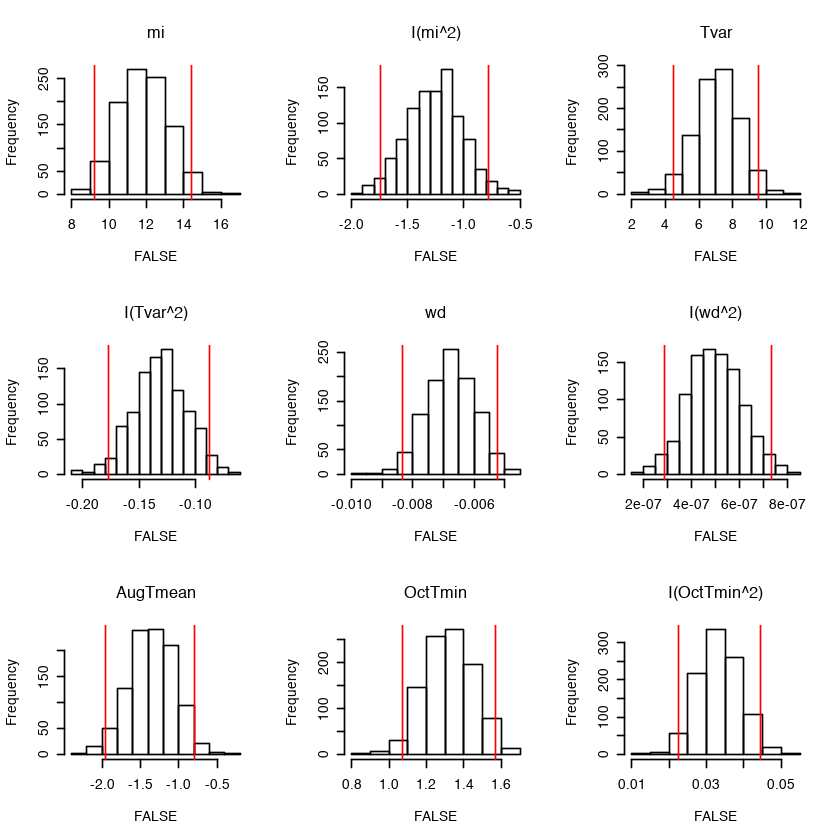

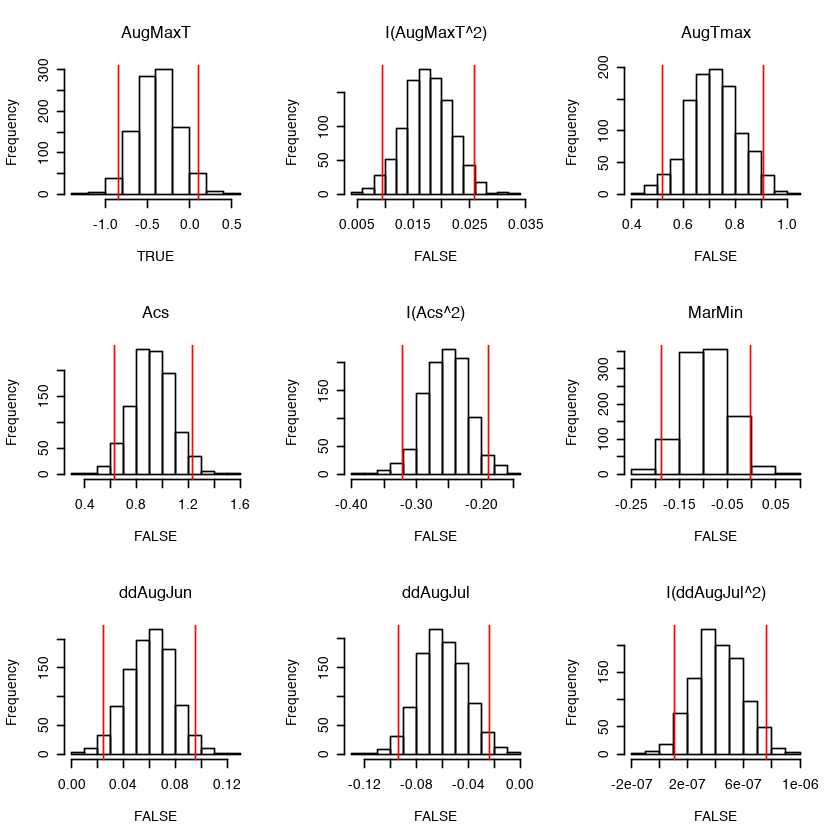

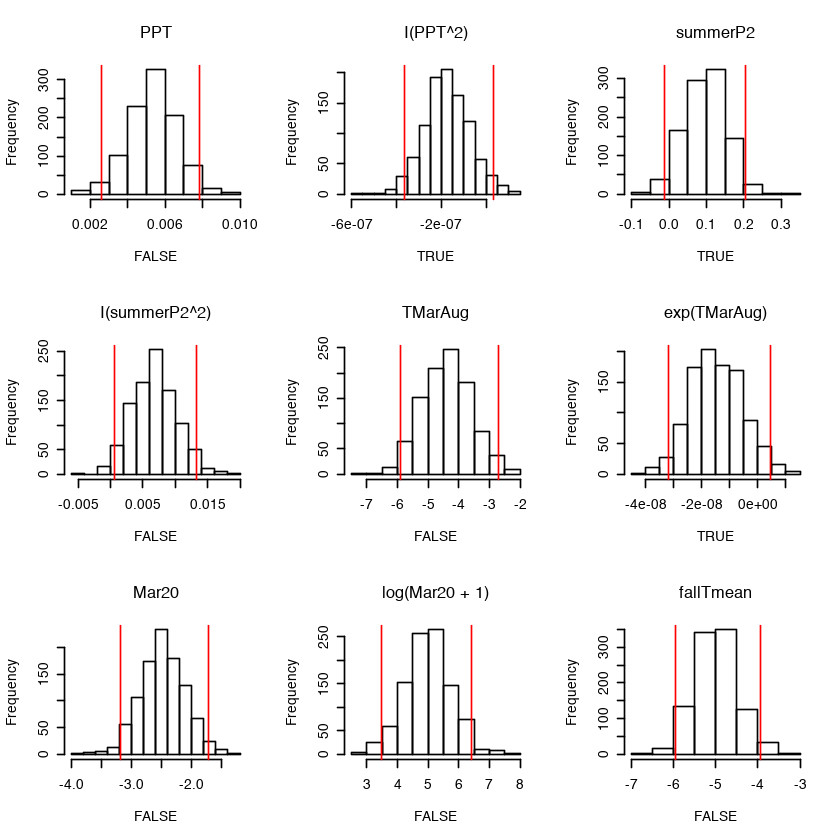

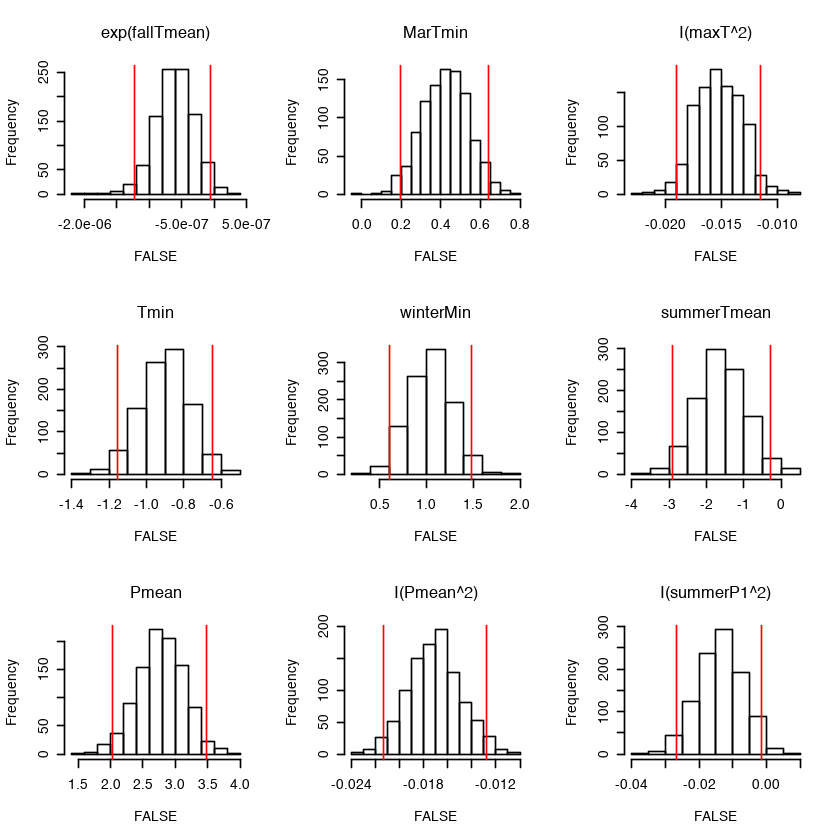

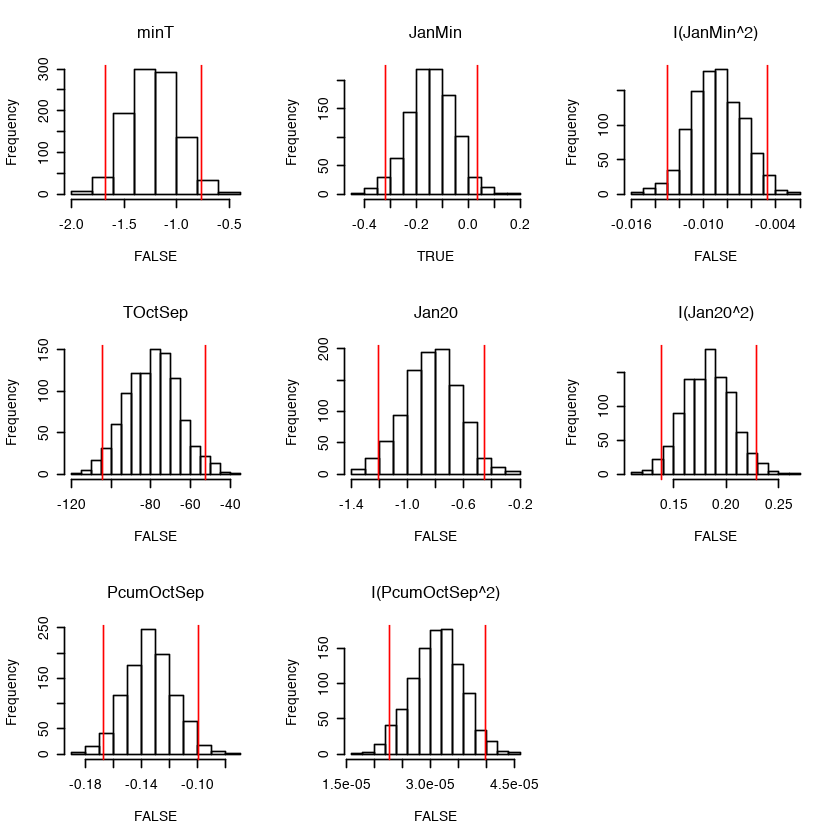

In [22]:
par(mfrow=c(3, 3))
removable <- c()
for (field in names(bstar)) {
    if(!(field %in% c('(Intercept)', 'summerP1'))){
        qs <- quantile(bstar[,field], prob=c(0.025, 0.975))
        remove <- 0 >= qs[1] & 0 <= qs[2]
        hist(bstar[,field], main=field, xlab=remove)
        abline(v=qs,col="red")
        if(remove){removable <- c(removable, field)}
    }
}

In [23]:
removable

[1] "prs"          "GAP2"         "summerP0"     "exp(Tmean)"   "AugMaxT"     
[6] "I(PPT^2)"     "summerP2"     "exp(TMarAug)" "JanMin"

In [11]:
mod <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + I(prs^2) + GAP1 + GAP3 + vpd + I(vpd^2) + I(cwd^2) + 
    I(maxAugT^2) + I(summerP0^2) + Tmean + I(Tmean^2) + mi + I(mi^2) + Tvar + I(Tvar^2) + 
    wd + I(wd^2) + AugTmean + OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + MarMin + 
    ddAugJun + ddAugJul + I(ddAugJul^2) + PPT + I(summerP2^2) + TMarAug + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + I(maxT^2) + Tmin + winterMin + summerTmean + 
    Pmean + I(Pmean^2) + I(summerP1^2) + minT + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + PcumOctSep + 
    I(PcumOctSep^2),
    data=data)

In [12]:
mod.r <- step(mod, trace=0)
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + I(prs^2) + GAP1 + 
    GAP3 + vpd + I(vpd^2) + I(cwd^2) + I(maxAugT^2) + I(summerP0^2) + 
    Tmean + I(Tmean^2) + mi + I(mi^2) + Tvar + I(Tvar^2) + wd + 
    I(wd^2) + AugTmean + OctTmin + I(OctTmin^2) + I(AugMaxT^2) + 
    AugTmax + Acs + I(Acs^2) + MarMin + ddAugJun + ddAugJul + 
    I(ddAugJul^2) + PPT + I(summerP2^2) + TMarAug + Mar20 + log(Mar20 + 
    1) + fallTmean + exp(fallTmean) + MarTmin + I(maxT^2) + Tmin + 
    winterMin + summerTmean + Pmean + I(Pmean^2) + I(summerP1^2) + 
    minT + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + PcumOctSep + 
    I(PcumOctSep^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4993 -1.0351  0.1362  1.1296  7.8853 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.302e+01  3.091e+01  -0.421 0.6

In [5]:
smoothed <- c(
  'lon', 'lat', 'etopo1', 'mStdAge', 'density', 'vcc', 'mfri',
  'prs', 'pms', 'pls', 'vpd', 'cwd', 'maxAugT', 'summerP0', 'Tmean', 'mi', 
  'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugMaxT', 'Acs', 'MarMin', 'ddAugJun', 
  'ddAugJul', 'JanTmin', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
  'MarTmin', 'maxT', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'summerP1', 'minT', 
  'JanMin', 'TOctSep', 'Jan20', 'PcumOctSep')

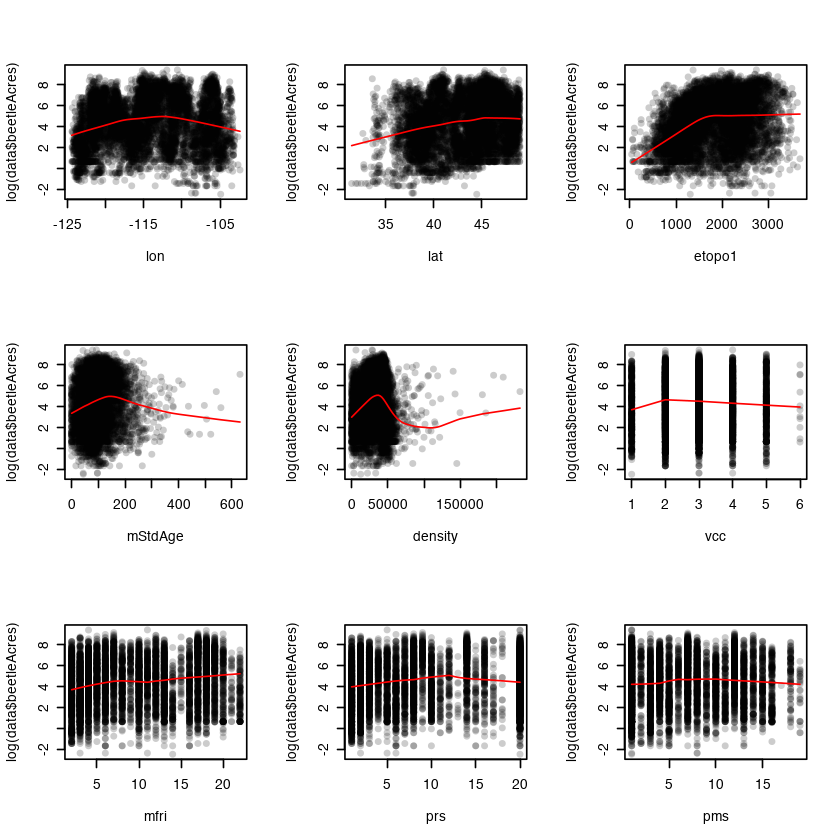

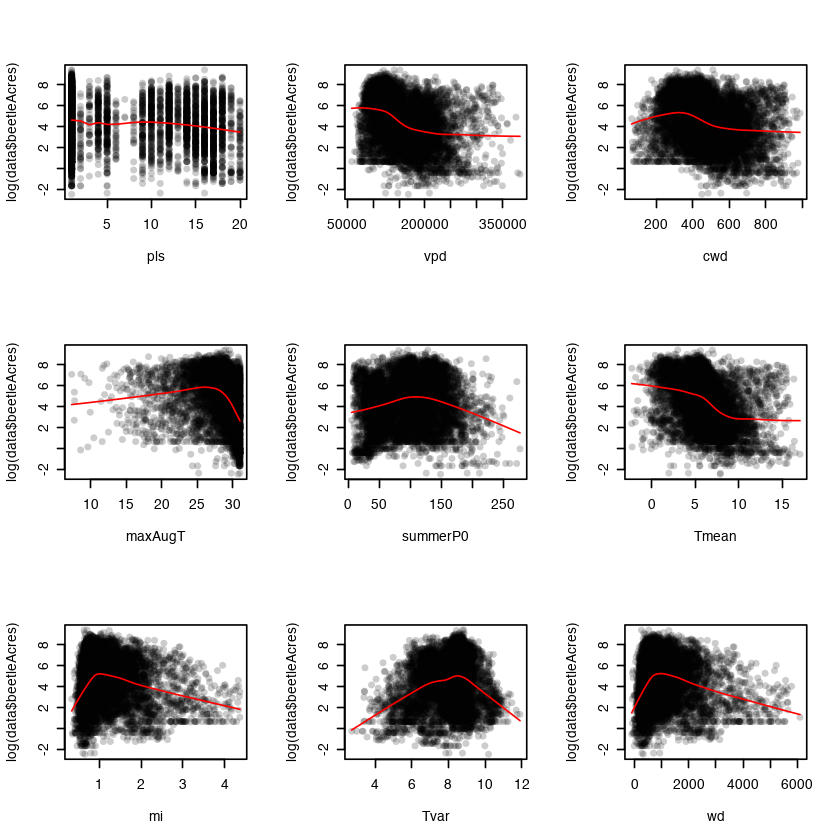

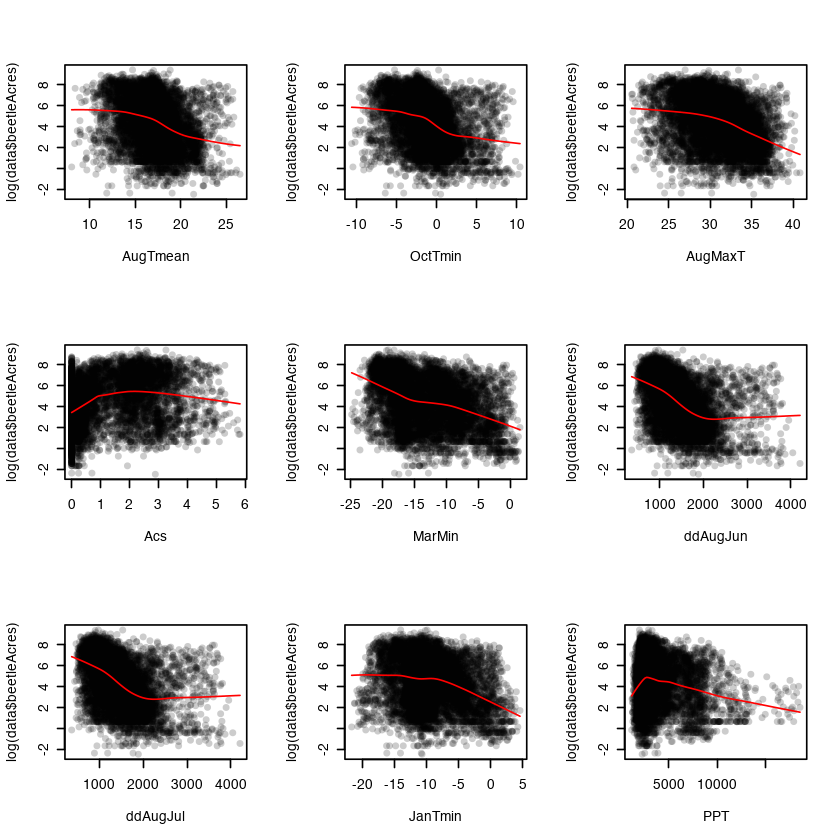

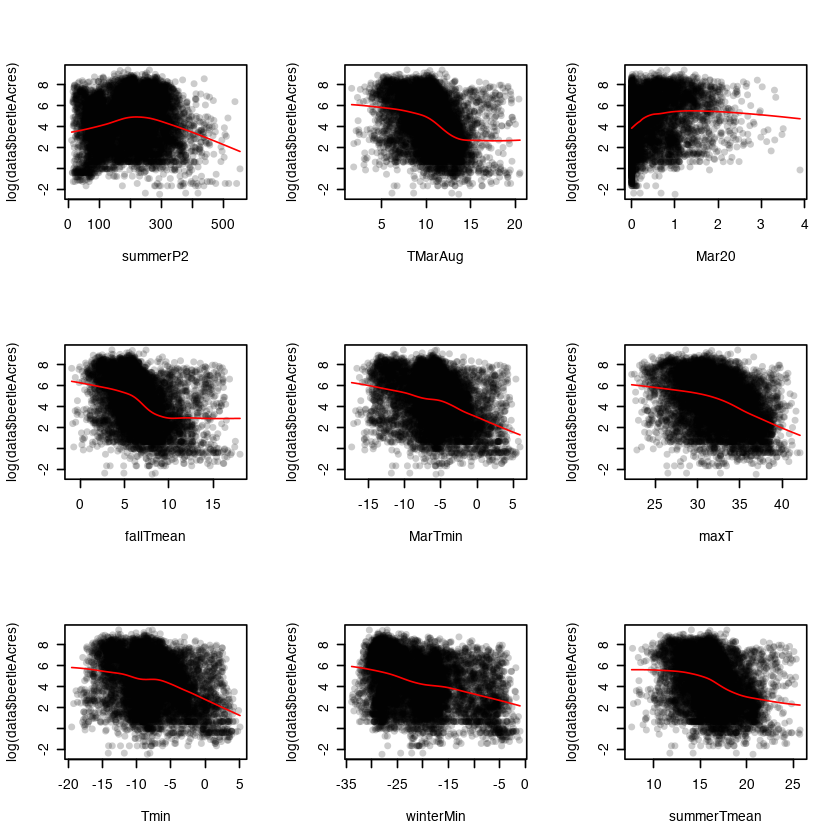

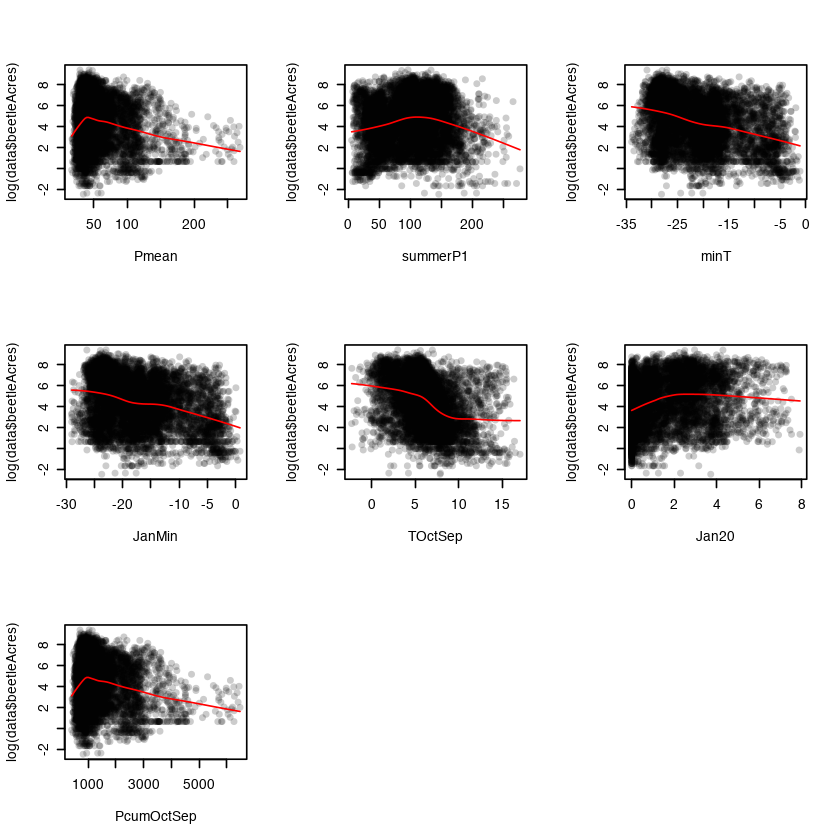

In [6]:
par(mfrow=c(3, 3))
for (field in smoothed) {
  plot(log(data$beetleAcres) ~ data[, field], 
       pch=16, 
       col=rgb(0, 0, 0, 0.2),
       xlab=field)
  lines(lowess(log(data$beetleAcres) ~ data[, field]), col=2)
}

In [3]:
mod <- lm(
    log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2),
    data=data)

In [4]:
mod.r <- step(mod, trace=0)

In [5]:
summary(mod.r)


Call:
lm(formula = log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2) + AugTmax + 
    Acs + I(Acs^2) + MarMin + ddAugJun + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + JanMin + I(JanMin^2) + TOctSep + Jan20 + 
    I(Jan20^2) + PcumOctSep + I(PcumOctSep^2), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3227 -1.0371  0.1295  1.1275  7.8009 

Coefficients:
          

In [16]:
library(rcompanion)
y <- data[,'beetleAcres']
y.tuk <- transformTukey(sample(y,5000),plotit=FALSE)


    lambda      W Shapiro.p.value
403   0.05 0.9811       2.637e-25

if (lambda >  0){TRANS = x ^ lambda} 
if (lambda == 0){TRANS = log(x)} 
if (lambda <  0){TRANS = -1 * x ^ lambda} 



In [6]:
mod <- lm(
    beetleAcres^0.05 ~ lon + I(lon^2) + lat + I(lat^2) + etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) 
    + density + I(density^2) + vcc + log(vcc) + mfri + log(mfri) + prs + I(prs^2) 
    + pms + pls + GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + maxAugT + I(maxAugT^2)
    + I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + mi + I(mi^2) + Tvar + I(Tvar^2) 
    + wd + I(wd^2) + AugTmean + I(AugTmean^2) + OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2)+ AugTmax 
    + Acs + I(Acs^2) + MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + JanTmin + PPT + I(PPT^2) 
    + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean)
    + MarTmin + maxT + I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + summerP1 + I(summerP1^2)
    + minT + JanMin + I(JanMin^2) + TOctSep + exp(TOctSep) + Jan20 + I(Jan20^2) + PcumOctSep + I(PcumOctSep^2),
    data=data)

In [7]:
mod.r <- step(mod, trace=0)

In [8]:
summary(mod.r)


Call:
lm(formula = beetleAcres^0.05 ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + 
    MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    maxT + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + 
    PcumOctSep + I(PcumOctSep^2), data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38152 -0.06573  0.00487  0.07039  0.49218 

Coefficients:
         

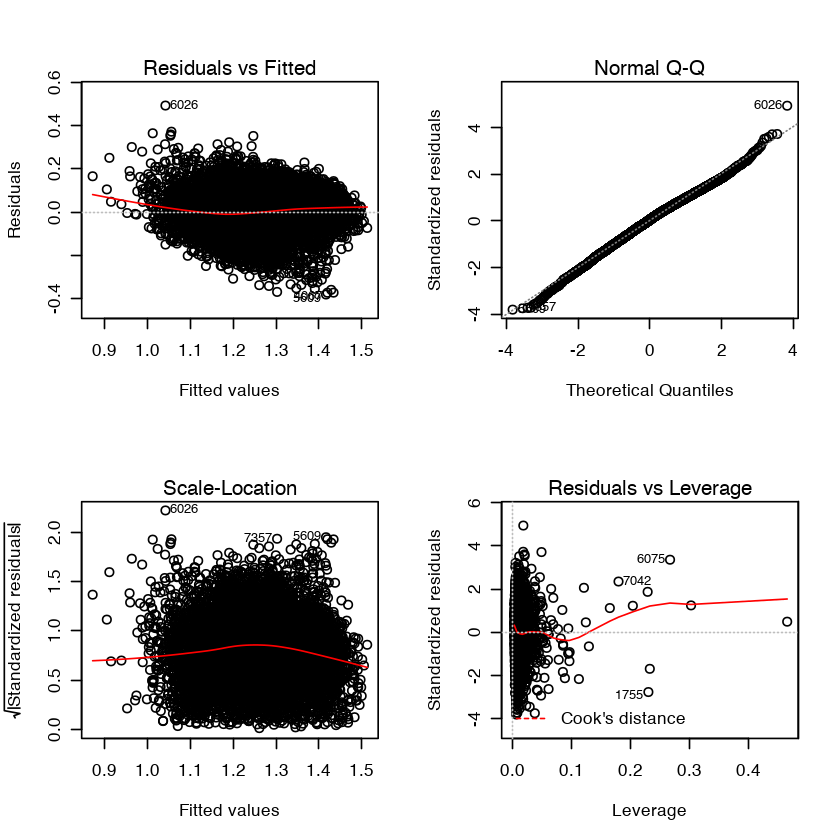

In [9]:
par(mfrow=c(2, 2))
plot(mod.r)

In [8]:
fit <- lm(
    beetleAcres^0.05 ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP3 + vpd + I(vpd^2) + cwd + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + I(AugMaxT^2) + AugTmax + Acs + I(Acs^2) + 
    MarMin + ddAugJun + I(ddAugJun^2) + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    maxT + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + I(JanMin^2) + TOctSep + Jan20 + I(Jan20^2) + 
    PcumOctSep + I(PcumOctSep^2), data = data)

Loading required package: carData


[1] 5609 6026

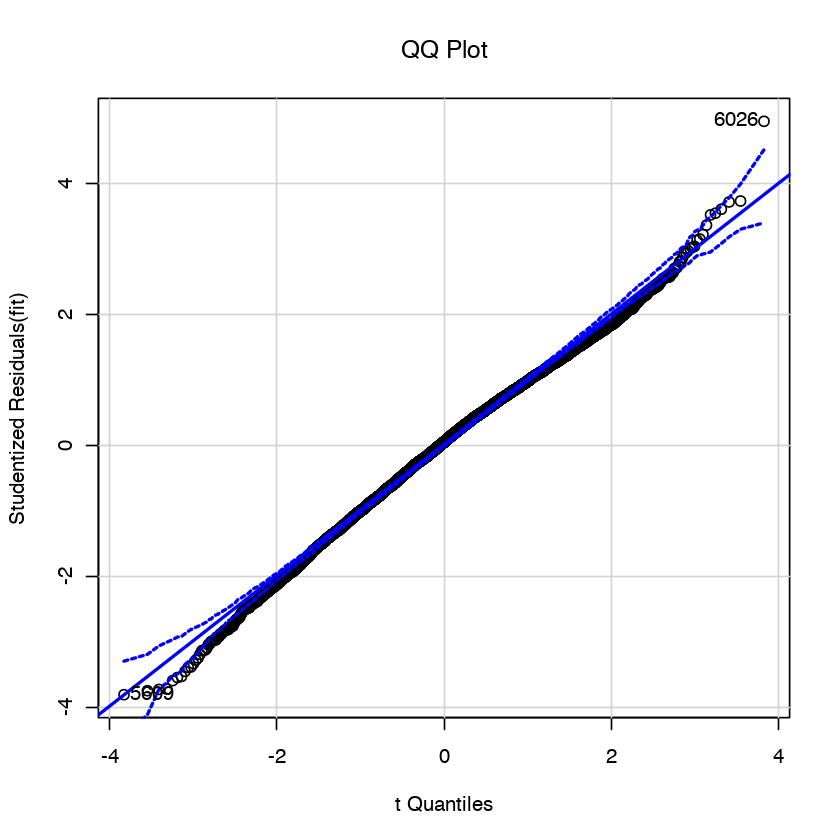

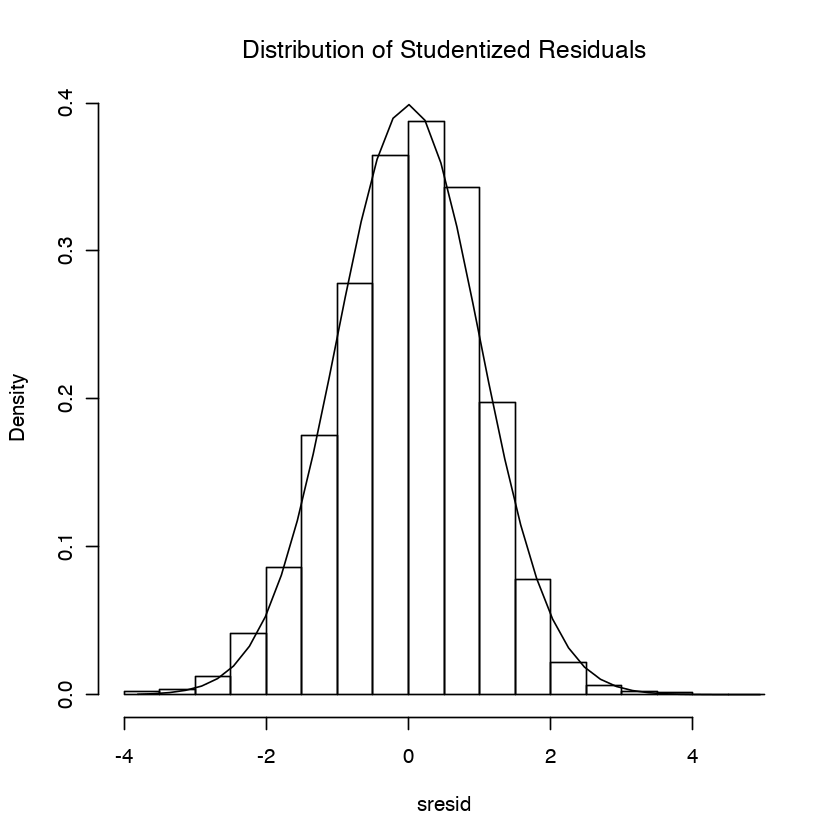

In [11]:
# Normality of Residuals
# qq plot for studentized resid
library(car)
qqPlot(fit, main="QQ Plot")
# distribution of studentized residuals
library(MASS)
sresid <- studres(fit)
hist(sresid, freq=FALSE,
   main="Distribution of Studentized Residuals")
xfit<-seq(min(sresid),max(sresid),length=40)
yfit<-dnorm(xfit)
lines(xfit, yfit) 

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 8.809003, Df = 1, p = 0.0029975


Suggested power transformation:  1.231922 

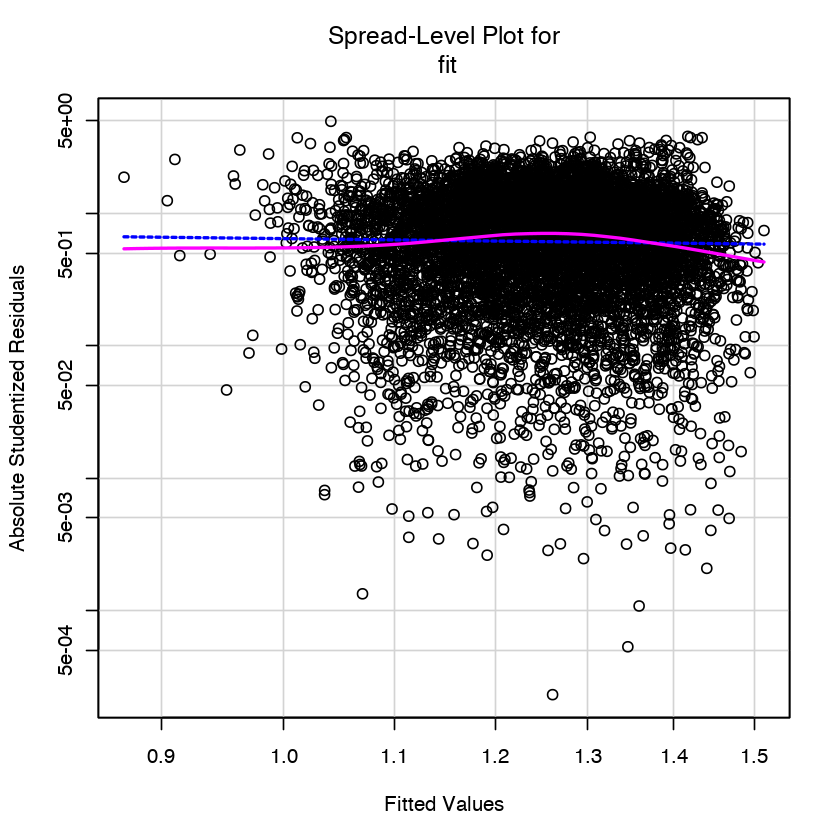

In [12]:
# Evaluate homoscedasticity
# non-constant error variance test
ncvTest(fit)
# plot studentized residuals vs. fitted values
spreadLevelPlot(fit)

In [13]:
# Evaluate Collinearity
vif(fit) # variance inflation factors
sqrt(vif(fit)) > 2 # problem?

lon        I(lon^2)             lat        I(lat^2)          etopo1 
   2.401898e+04    2.445719e+04    4.918840e+03    5.534822e+03    1.175310e+02 
    I(etopo1^2)         mStdAge    I(mStdAge^2)         density    I(density^2) 
   8.924425e+01    5.989799e+00    5.679020e+00    5.264161e+00    3.891169e+00 
       log(vcc)            mfri       log(mfri)             prs        I(prs^2) 
   1.253961e+00    1.911665e+01    2.039689e+01    4.625135e+01    4.038789e+01 
           GAP1            GAP3             vpd        I(vpd^2)             cwd 
   1.512152e+00    1.398251e+00    7.104140e+02    4.525364e+02    3.697655e+02 
       I(cwd^2)    I(maxAugT^2)   I(summerP0^2)        summerP0           Tmean 
   2.966961e+02    1.580986e+01    9.107545e+06    6.283000e+04    3.653981e+06 
     I(Tmean^2)      exp(Tmean)              mi         I(mi^2)            Tvar 
   1.787654e+02    3.709326e+02    2.215729e+03    9.645432e+02    6.965823e+03 
      I(Tvar^2)              wd         I(wd^2)        AugTmean         OctTmin 
   4.352395e+02    1.550580e+03    5.023402e+02    1.370551e+03    3.197073e+02 
   I(OctTmin^2)    I(AugMaxT^2)         AugTmax             Acs        I(Acs^2) 
   1.853947e+01    4.025297e+02    1.486247e+02    1.011556e+02    5.908617e+01 
         MarMin        ddAugJun   I(ddAugJun^2)        ddAugJul   I(ddAugJul^2) 
   1.726287e+02    4.528452e+06    2.862602e+07    4.515154e+06    2.859587e+07 
            PPT        I(PPT^2)        summerP2   I(summerP2^2)         TMarAug 
   2.208026e+04    2.465101e+04    6.255342e+04    3.667833e+07    1.207034e+04 
   exp(TMarAug)           Mar20  log(Mar20 + 1)       fallTmean  exp(fallTmean) 
   5.635762e+01    1.173366e+02    1.656410e+02    4.873628e+03    1.626677e+02 
        MarTmin            maxT            Tmin       winterMin     summerTmean 
   5.399706e+02    3.967673e+02    7.966001e+02    7.411873e+03    8.060441e+03 
          Pmean      I(Pmean^2)   I(summerP1^2)            minT     I(JanMin^2) 
   3.997123e+05    5.024871e+05    9.272137e+06    7.509609e+03    2.587605e+02 
        TOctSep           Jan20      I(Jan20^2)      PcumOctSep I(PcumOctSep^2) 
   3.539848e+06    2.465552e+02    8.581722e+01    5.352159e+05    6.938882e+05

lon        I(lon^2)             lat        I(lat^2)          etopo1 
           TRUE            TRUE            TRUE            TRUE            TRUE 
    I(etopo1^2)         mStdAge    I(mStdAge^2)         density    I(density^2) 
           TRUE            TRUE            TRUE            TRUE           FALSE 
       log(vcc)            mfri       log(mfri)             prs        I(prs^2) 
          FALSE            TRUE            TRUE            TRUE            TRUE 
           GAP1            GAP3             vpd        I(vpd^2)             cwd 
          FALSE           FALSE            TRUE            TRUE            TRUE 
       I(cwd^2)    I(maxAugT^2)   I(summerP0^2)        summerP0           Tmean 
           TRUE            TRUE            TRUE            TRUE            TRUE 
     I(Tmean^2)      exp(Tmean)              mi         I(mi^2)            Tvar 
           TRUE            TRUE            TRUE            TRUE            TRUE 
      I(Tvar^2)              wd         I(wd^2)        AugTmean         OctTmin 
           TRUE            TRUE            TRUE            TRUE            TRUE 
   I(OctTmin^2)    I(AugMaxT^2)         AugTmax             Acs        I(Acs^2) 
           TRUE            TRUE            TRUE            TRUE            TRUE 
         MarMin        ddAugJun   I(ddAugJun^2)        ddAugJul   I(ddAugJul^2) 
           TRUE            TRUE            TRUE            TRUE            TRUE 
            PPT        I(PPT^2)        summerP2   I(summerP2^2)         TMarAug 
           TRUE            TRUE            TRUE            TRUE            TRUE 
   exp(TMarAug)           Mar20  log(Mar20 + 1)       fallTmean  exp(fallTmean) 
           TRUE            TRUE            TRUE            TRUE            TRUE 
        MarTmin            maxT            Tmin       winterMin     summerTmean 
           TRUE            TRUE            TRUE            TRUE            TRUE 
          Pmean      I(Pmean^2)   I(summerP1^2)            minT     I(JanMin^2) 
           TRUE            TRUE            TRUE            TRUE            TRUE 
        TOctSep           Jan20      I(Jan20^2)      PcumOctSep I(PcumOctSep^2) 
           TRUE            TRUE            TRUE            TRUE            TRUE

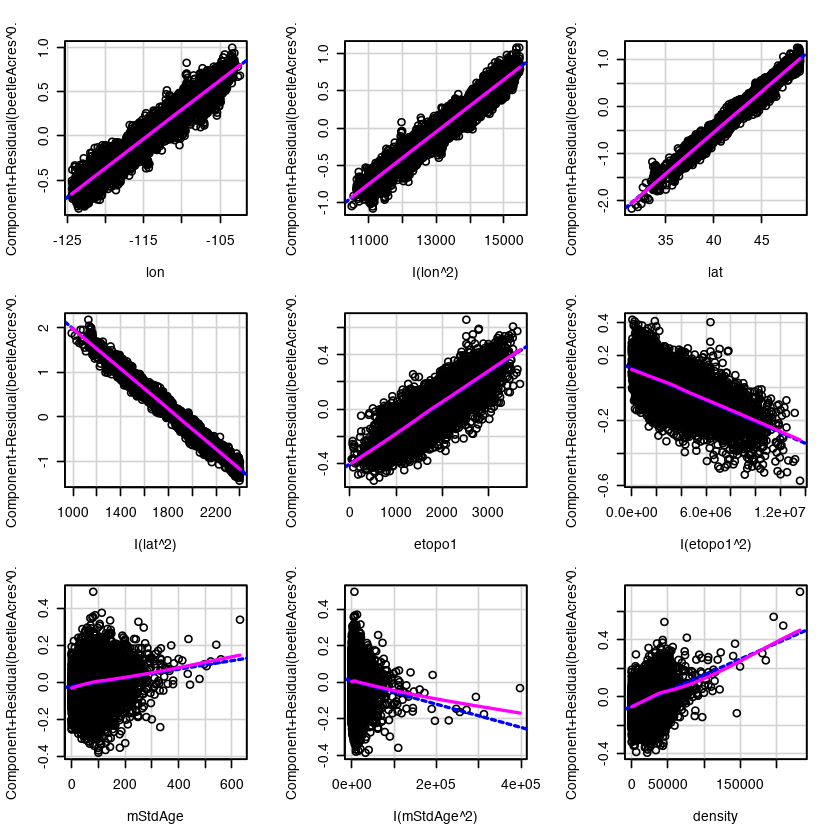

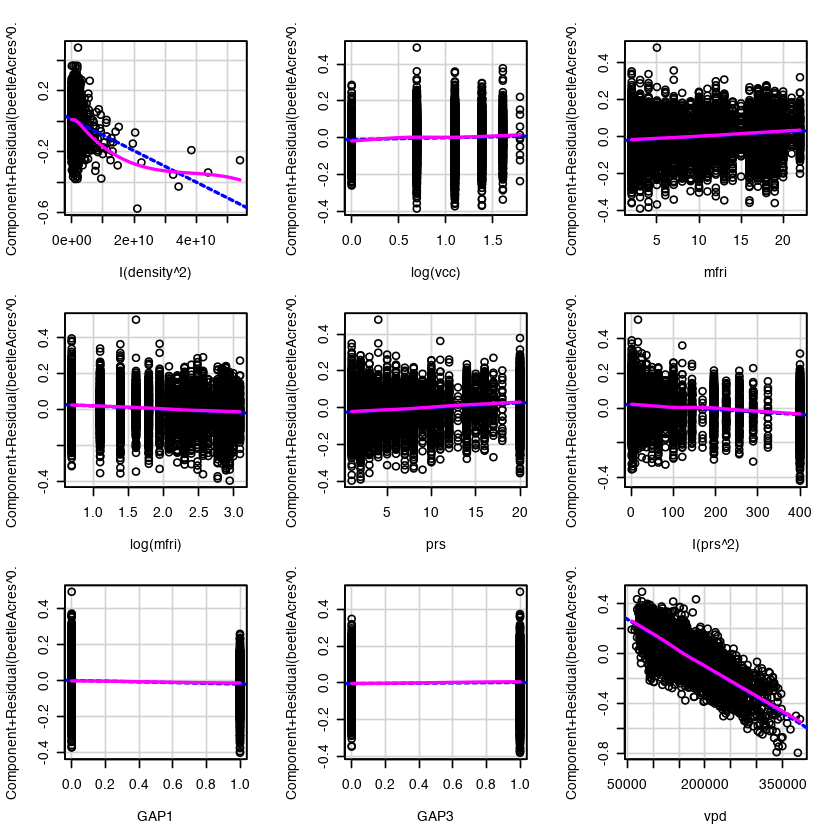

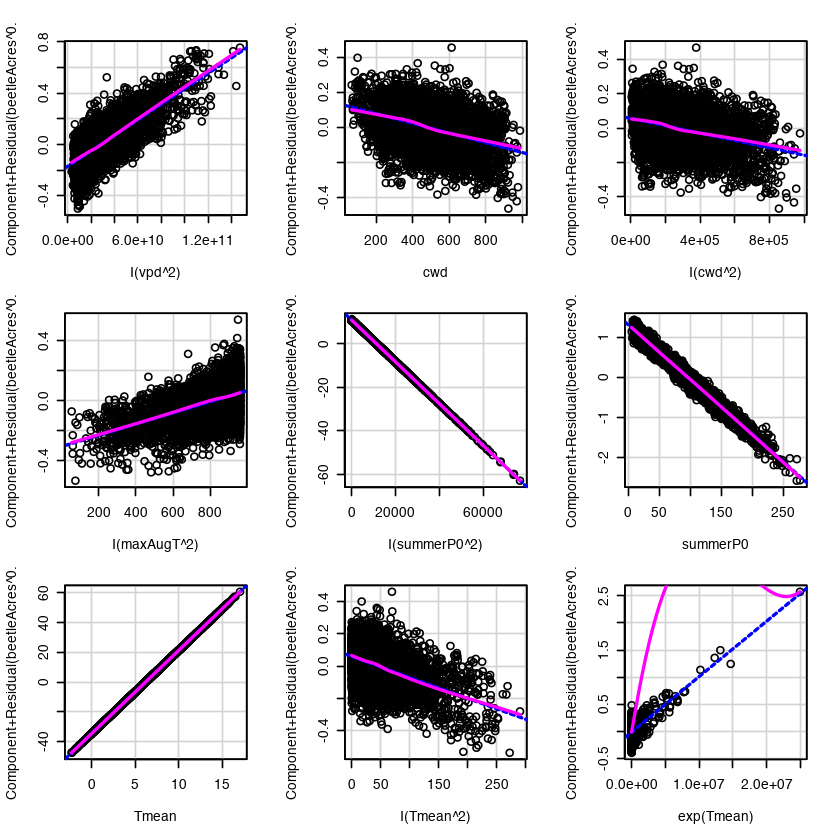

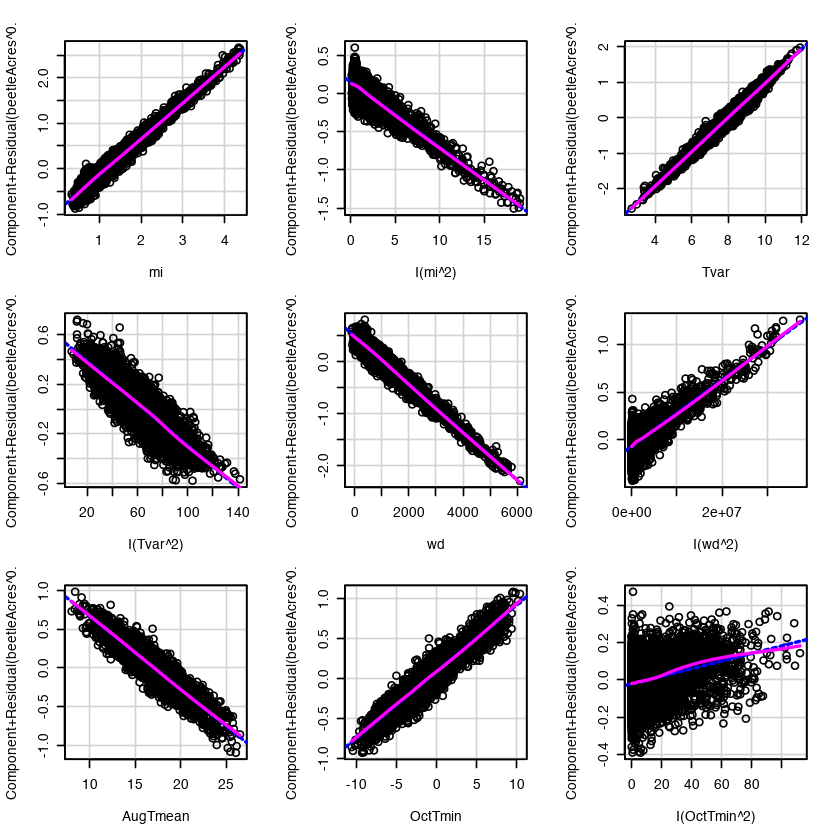

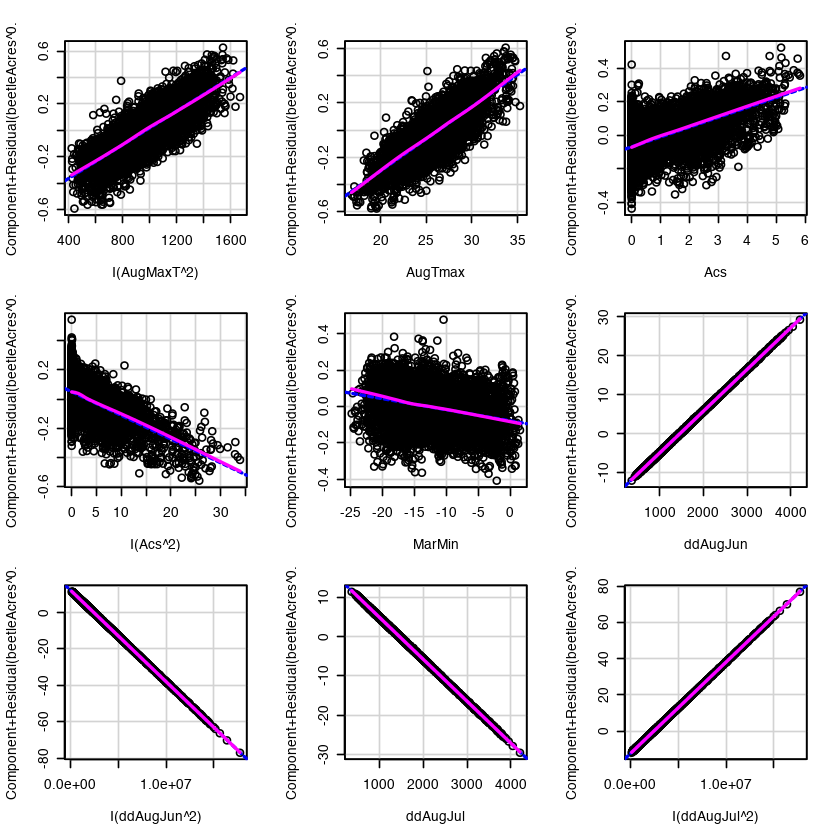

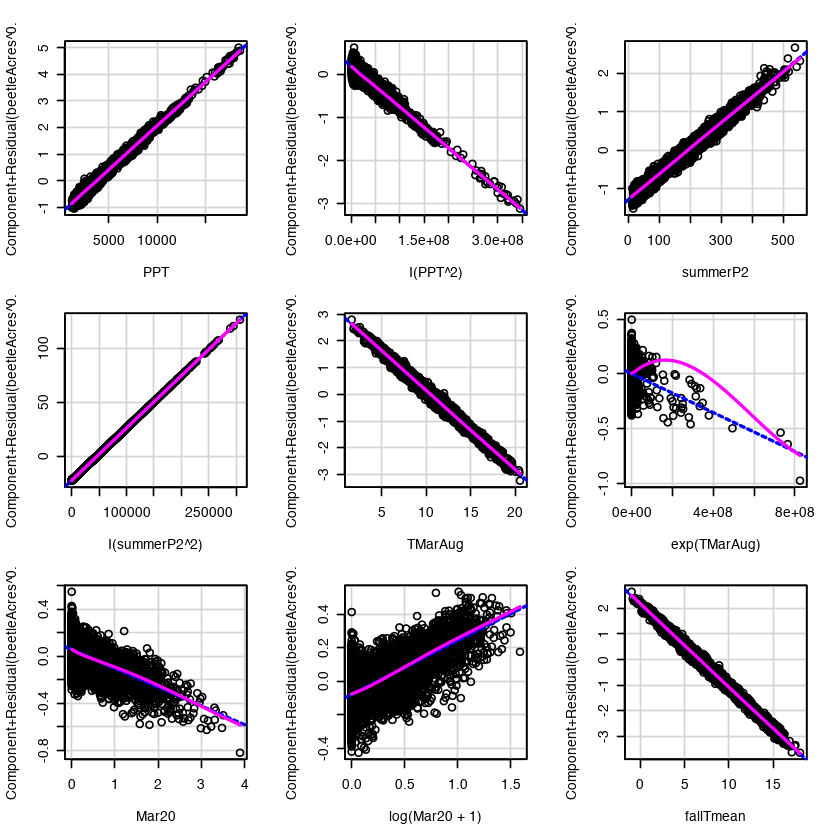

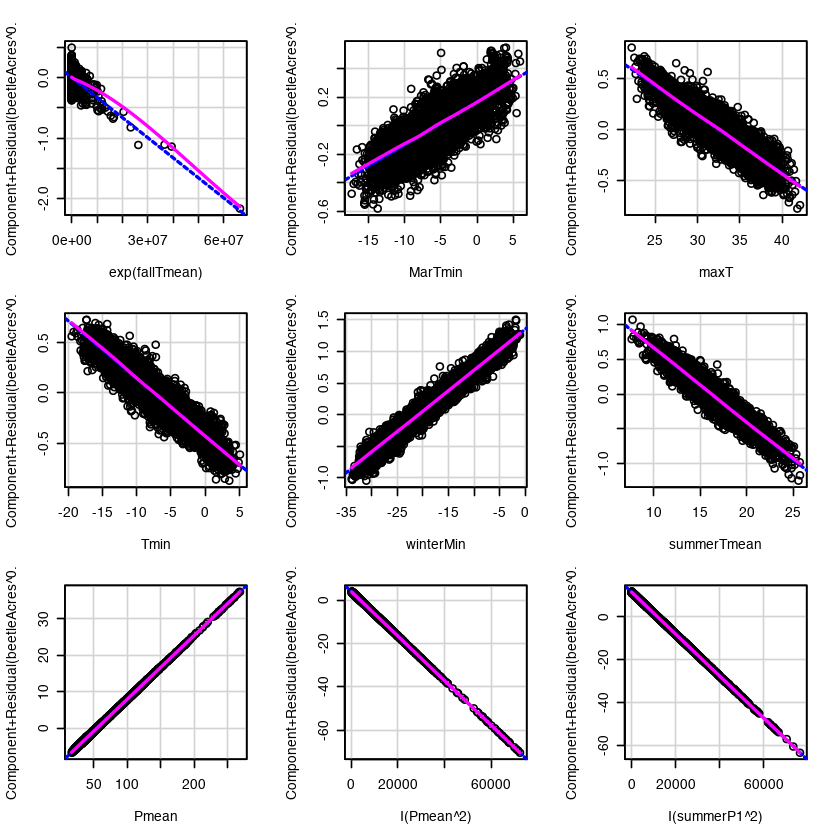

Warning message in ceresPlots(fit):
“Factors skipped in drawing CERES plots.”Warning message in min(x):
“no non-missing arguments to min; returning Inf”Warning message in max(x):
“no non-missing arguments to max; returning -Inf”

ERROR: Error in plot.window(...): need finite 'ylim' values


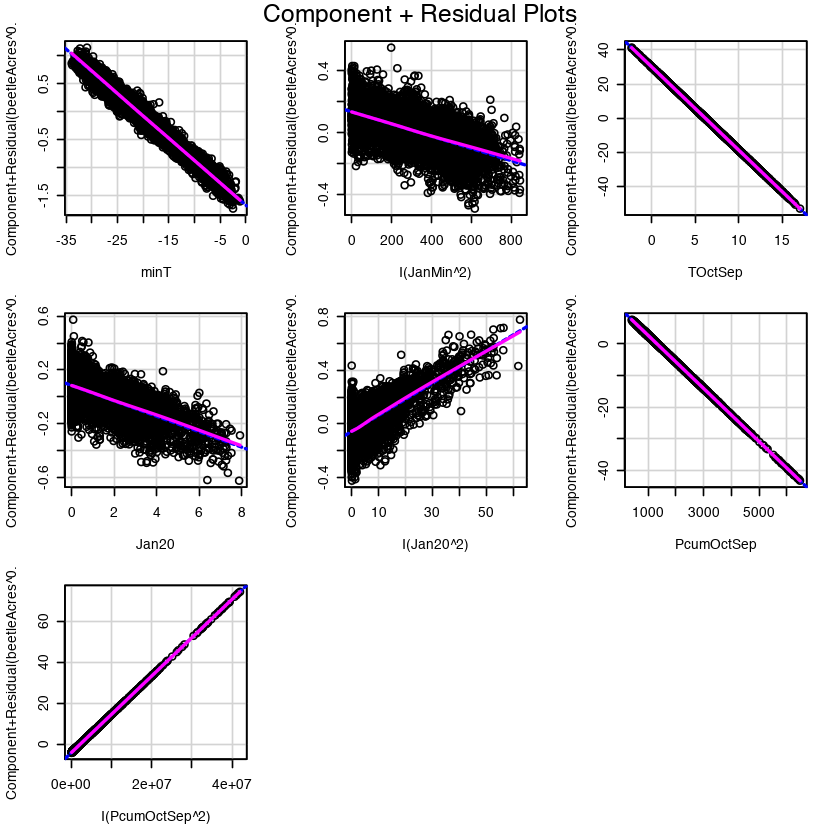

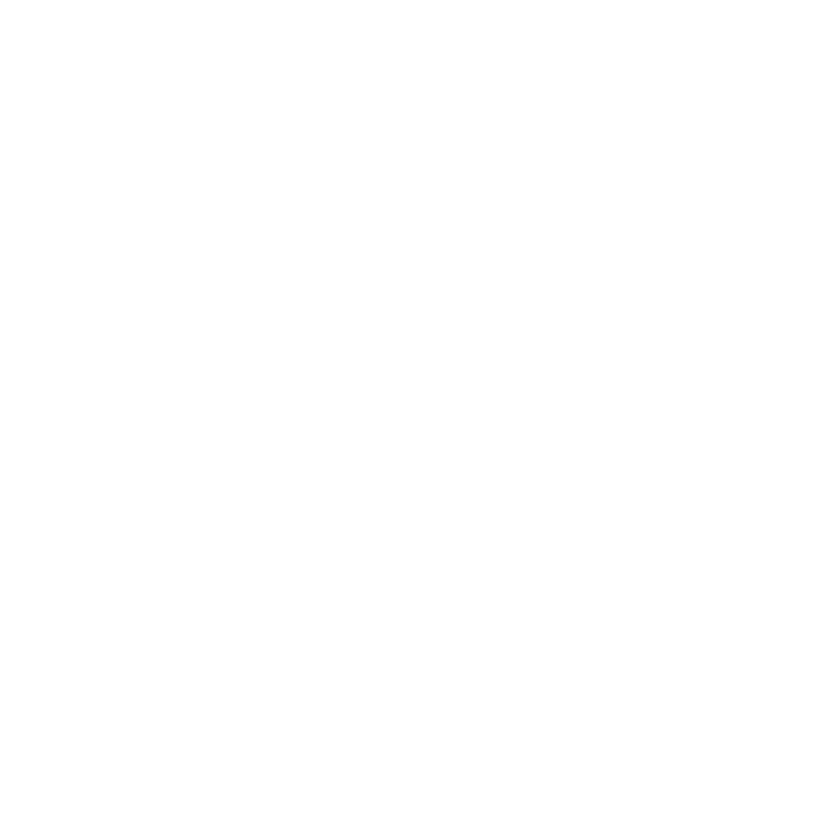

In [14]:
# Evaluate Nonlinearity
# component + residual plot
crPlots(fit)
# Ceres plots
ceresPlots(fit)

In [21]:
data$preds <- mod.r$fitted

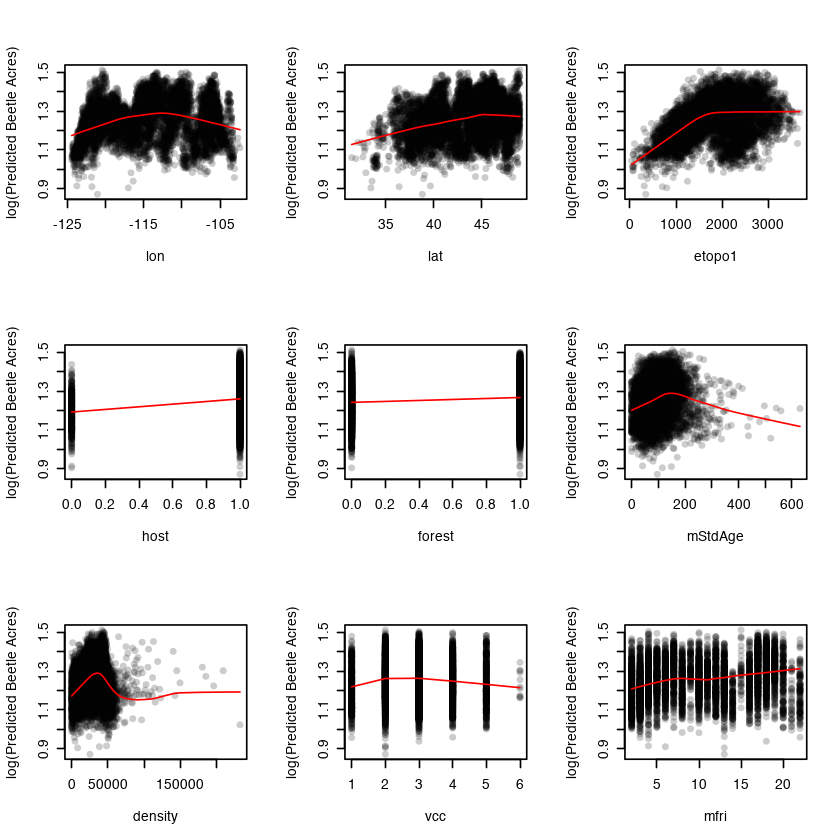

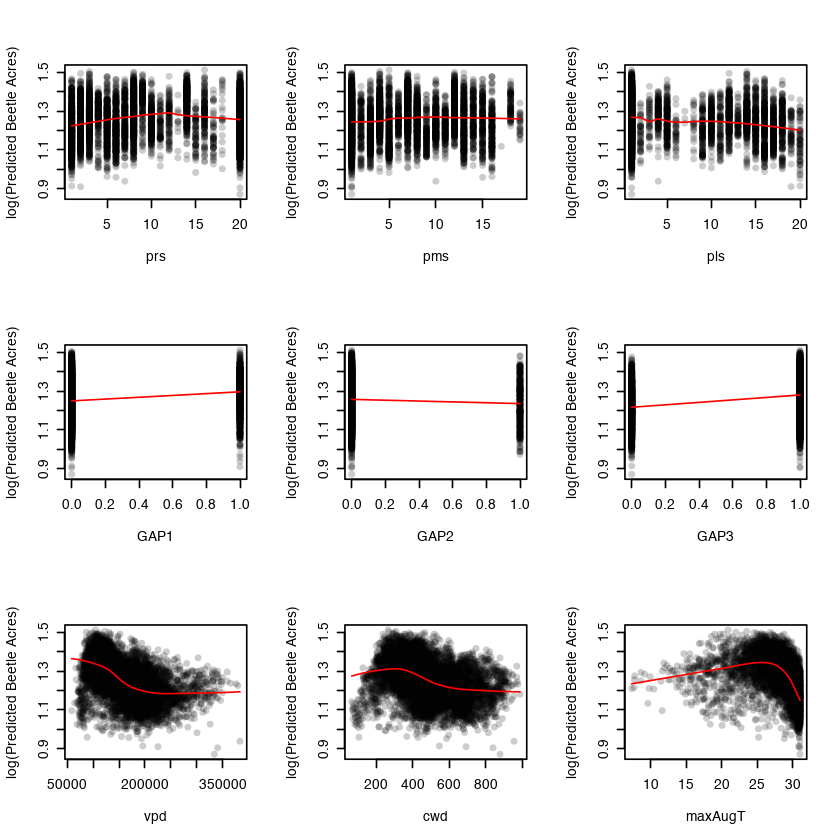

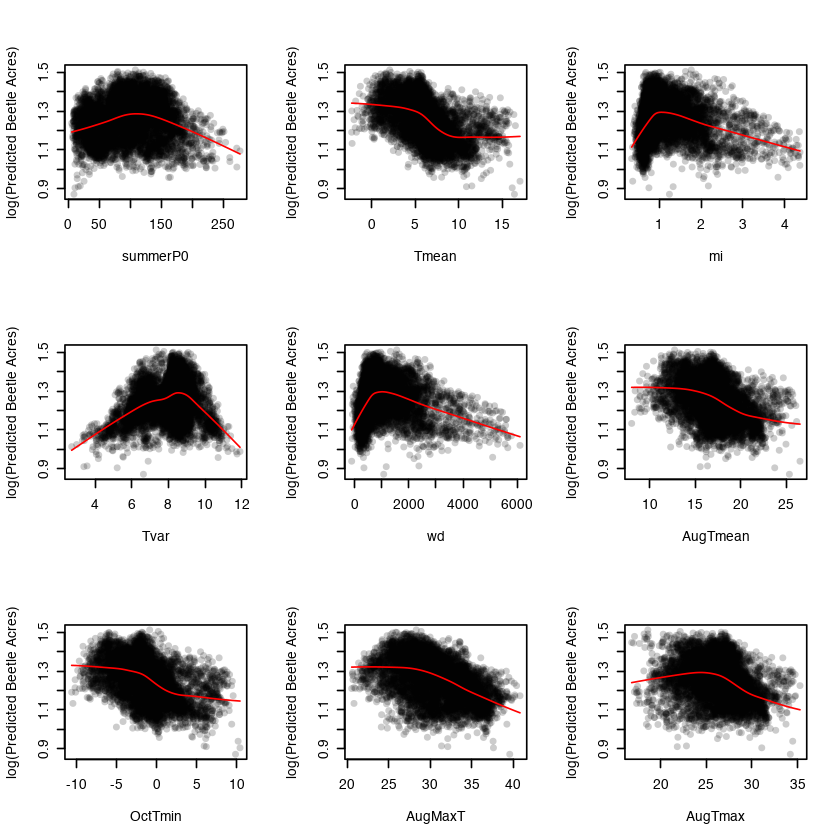

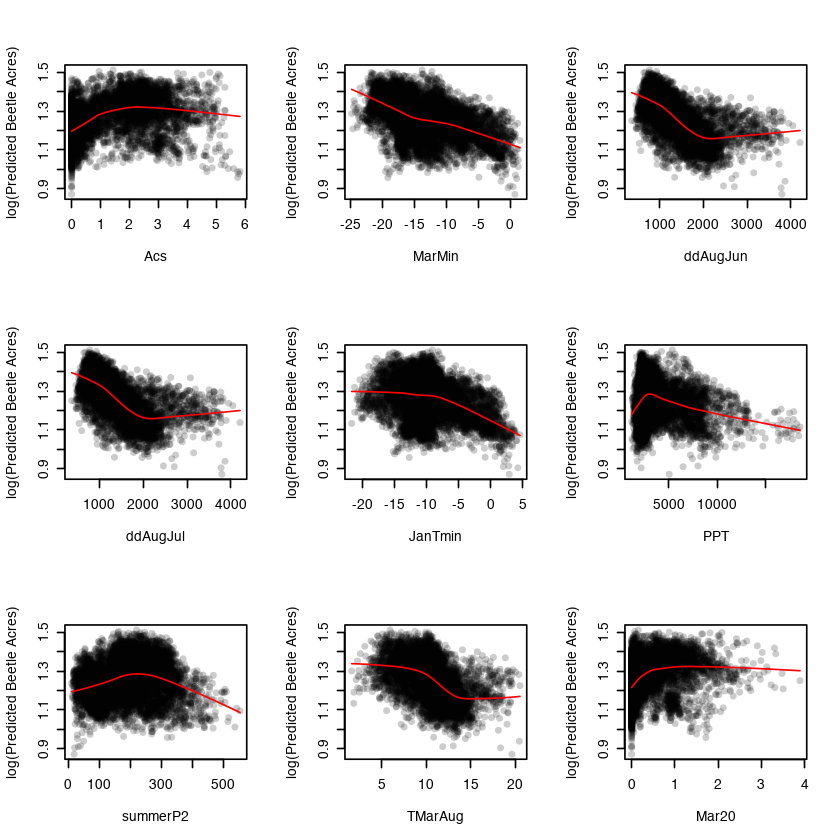

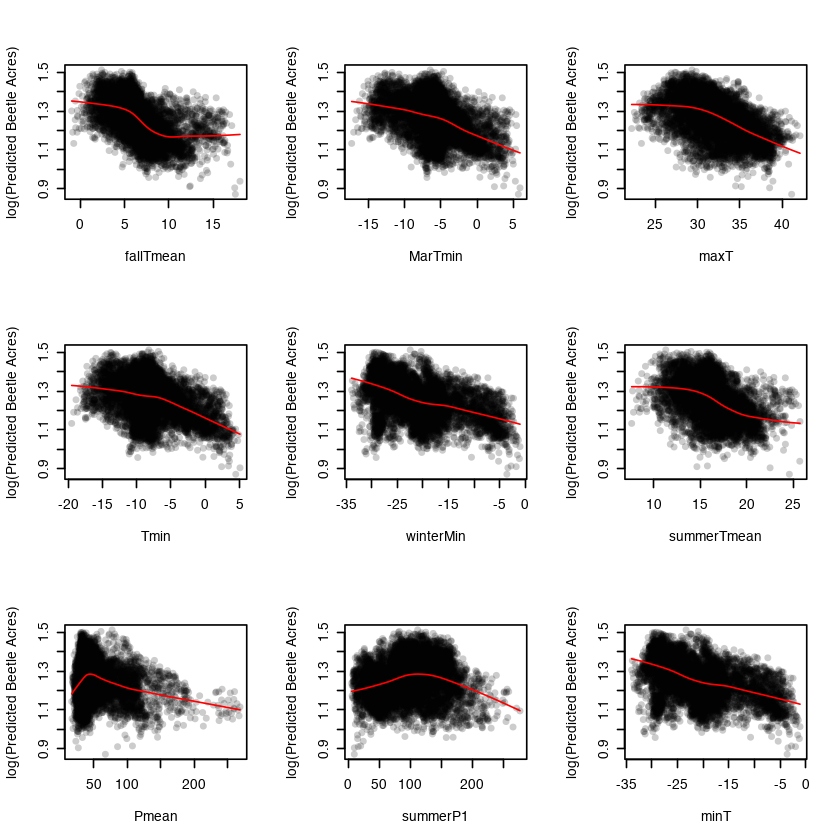

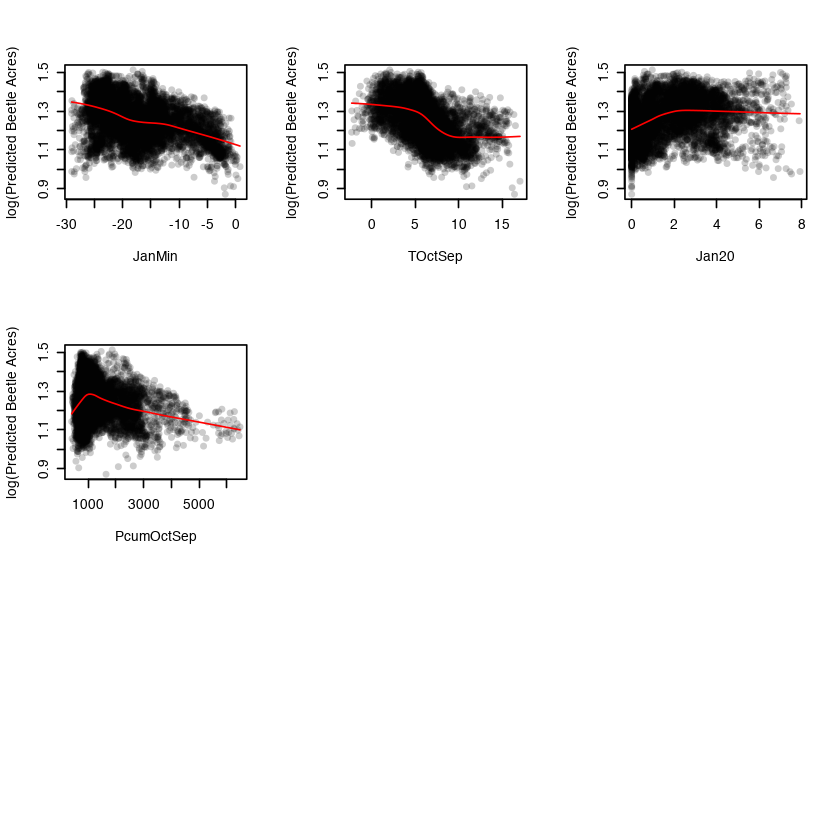

In [24]:
par(mfrow=c(3, 3))
for (field in names(data)) {
  if (!(field %in% c('beetleAcres', 'preds'))) {
    plot(data$preds ~ data[, field], 
         pch=16, 
         col=rgb(0, 0, 0, 0.2), 
         xlab=field,
         ylab='log(Predicted Beetle Acres)')
    lines(lowess(data$preds ~ data[, field]), col=2)
  }
}

In [32]:
med.df <- data.frame(t(apply(data, 2, median)))
n.steps <- 100
med.df <- med.df[rep(1, n.steps), ]

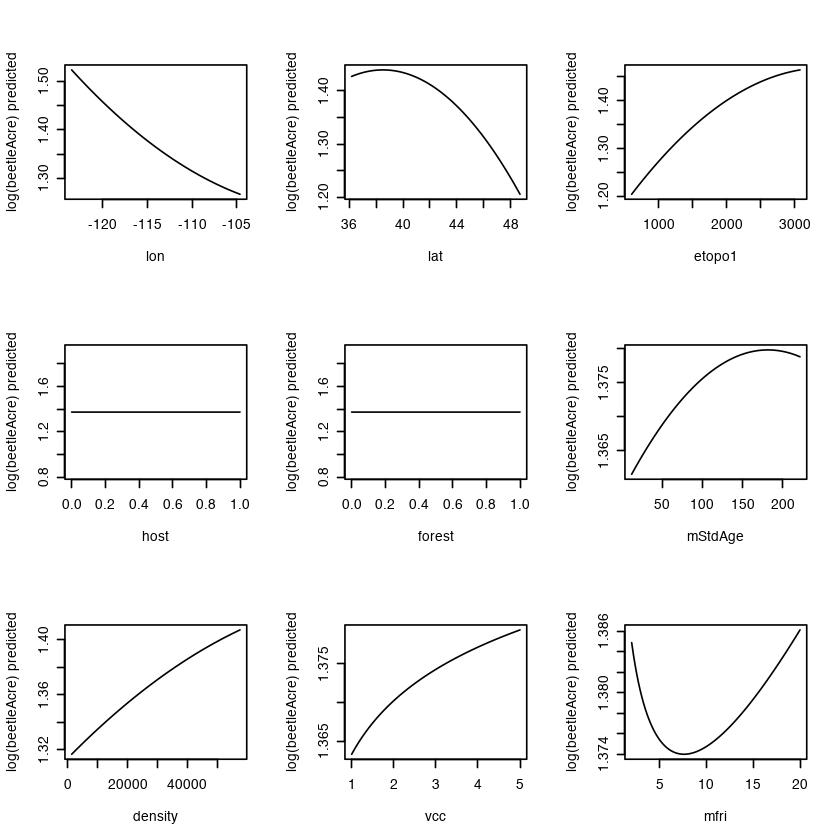

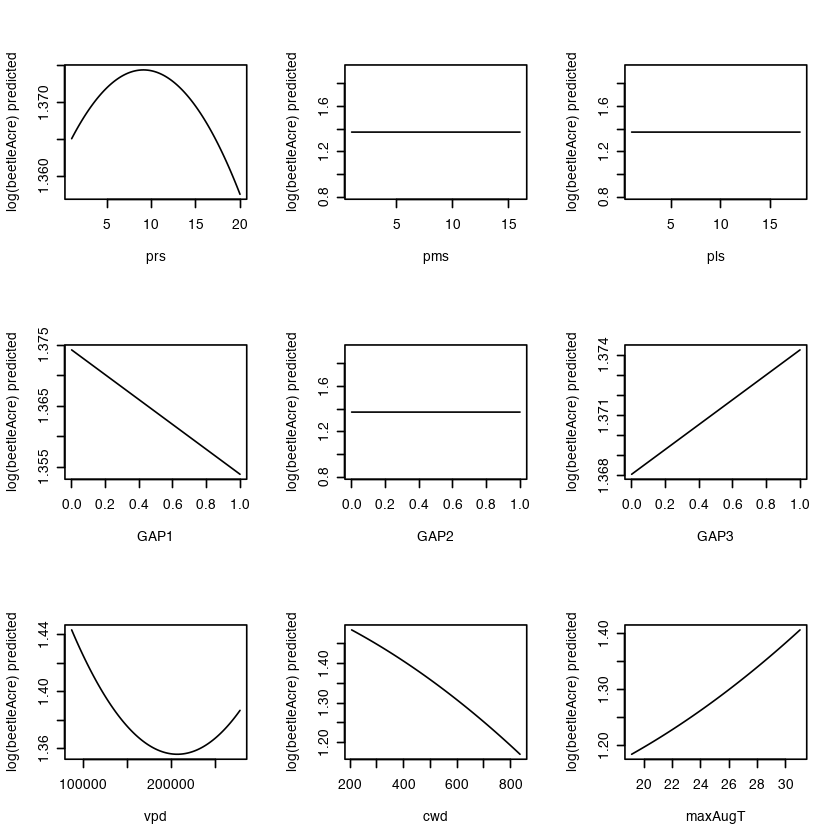

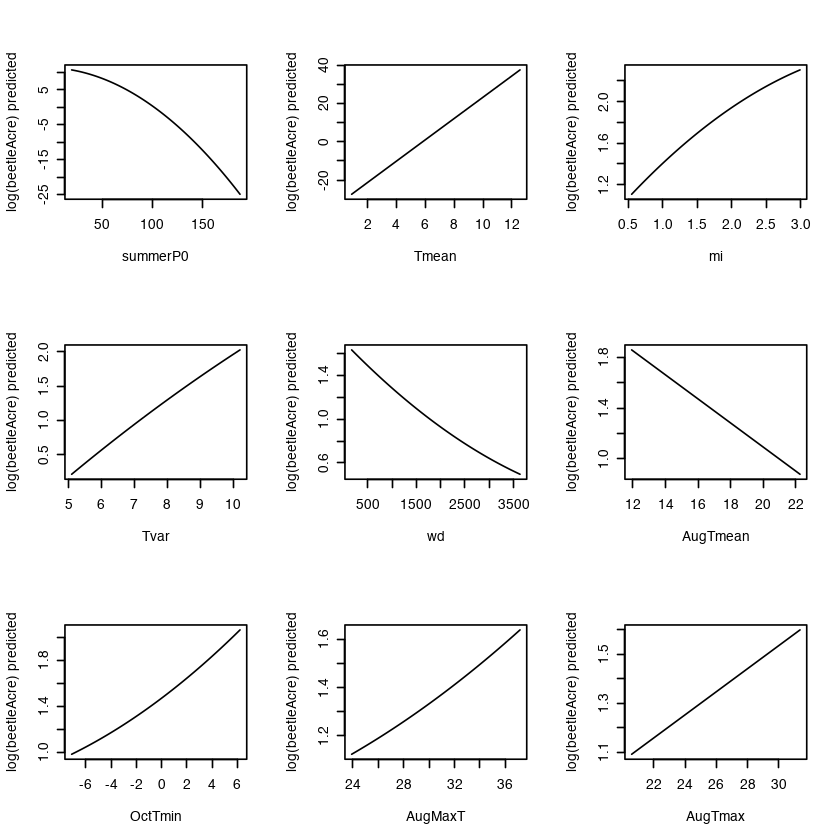

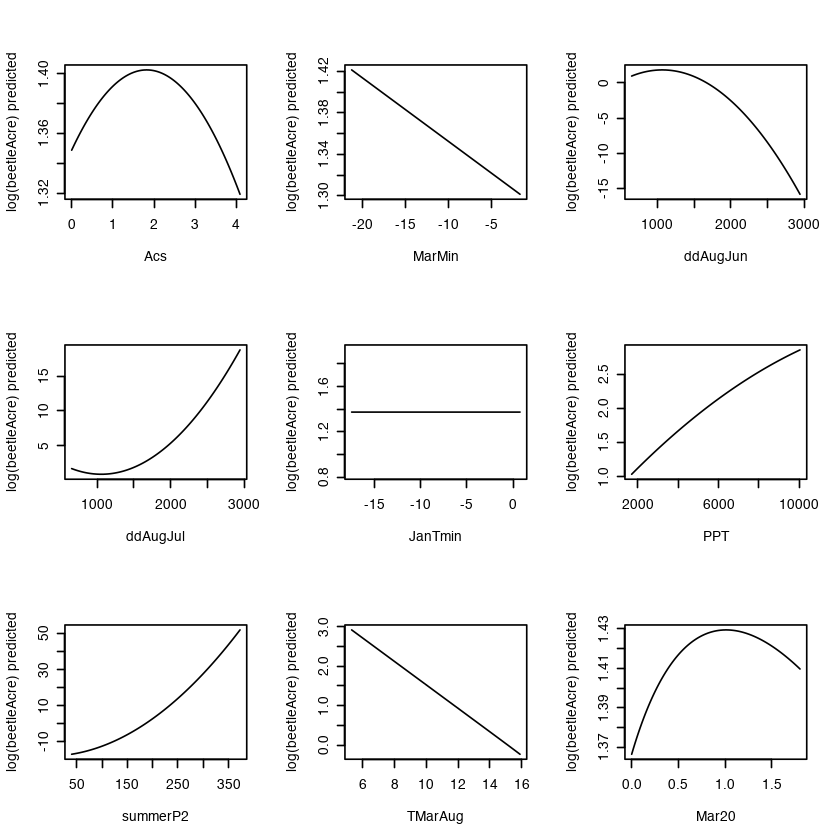

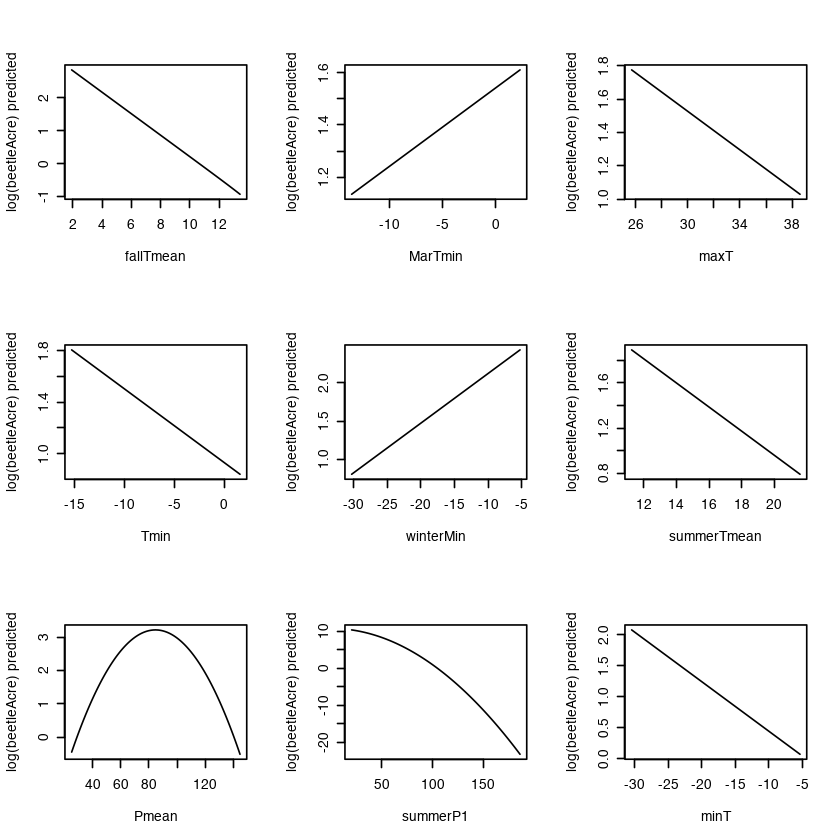

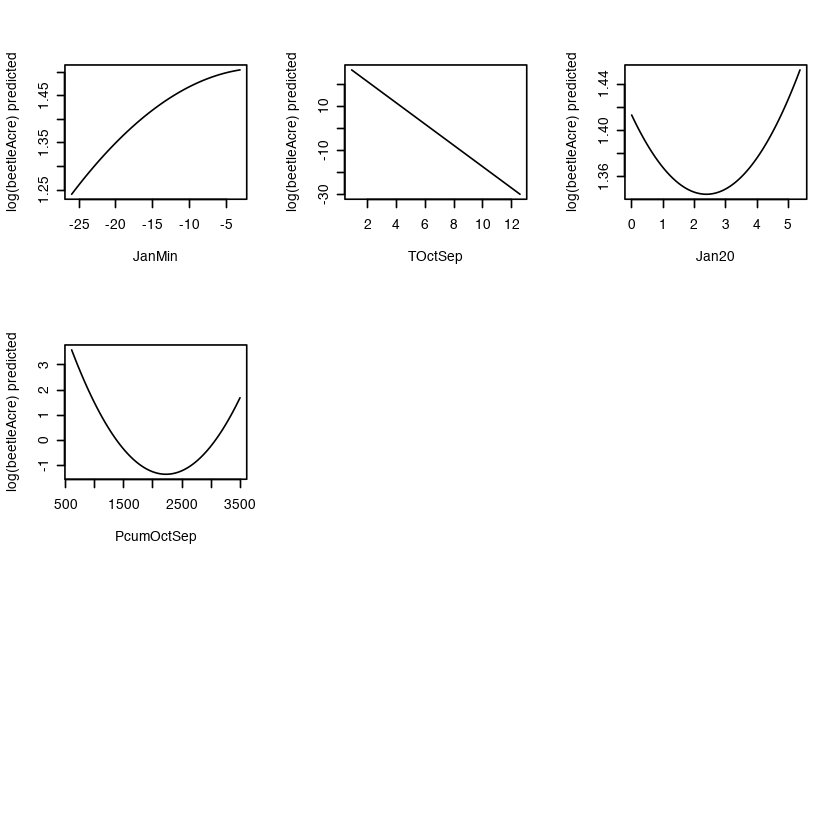

In [26]:
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- predict(mod.r, newdata=test.df)
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='log(beetleAcre) predicted')
  }
}

In [31]:
# logarithm of beetle data
mod.r <- lm(log(beetleAcres) ~ lon + I(lon^2) + lat + I(lat^2) + 
    etopo1 + I(etopo1^2) + mStdAge + I(mStdAge^2) + density + 
    I(density^2) + log(vcc) + mfri + log(mfri) + prs + I(prs^2) + 
    GAP1 + GAP2 + GAP3 + vpd + I(vpd^2) + I(cwd^2) + I(maxAugT^2) + 
    I(summerP0^2) + summerP0 + Tmean + I(Tmean^2) + exp(Tmean) + 
    mi + I(mi^2) + Tvar + I(Tvar^2) + wd + I(wd^2) + AugTmean + 
    OctTmin + I(OctTmin^2) + AugMaxT + I(AugMaxT^2) + AugTmax + 
    Acs + I(Acs^2) + MarMin + ddAugJun + ddAugJul + I(ddAugJul^2) + 
    PPT + I(PPT^2) + summerP2 + I(summerP2^2) + TMarAug + exp(TMarAug) + 
    Mar20 + log(Mar20 + 1) + fallTmean + exp(fallTmean) + MarTmin + 
    I(maxT^2) + Tmin + winterMin + summerTmean + Pmean + I(Pmean^2) + 
    I(summerP1^2) + minT + JanMin + I(JanMin^2) + TOctSep + Jan20 + 
    I(Jan20^2) + PcumOctSep + I(PcumOctSep^2), data = data)

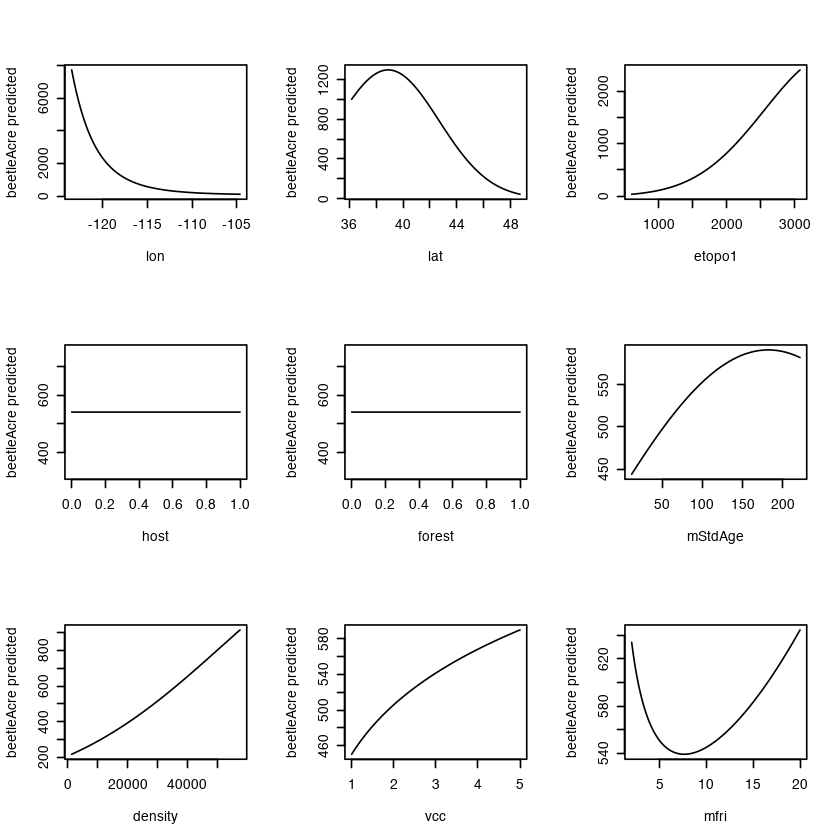

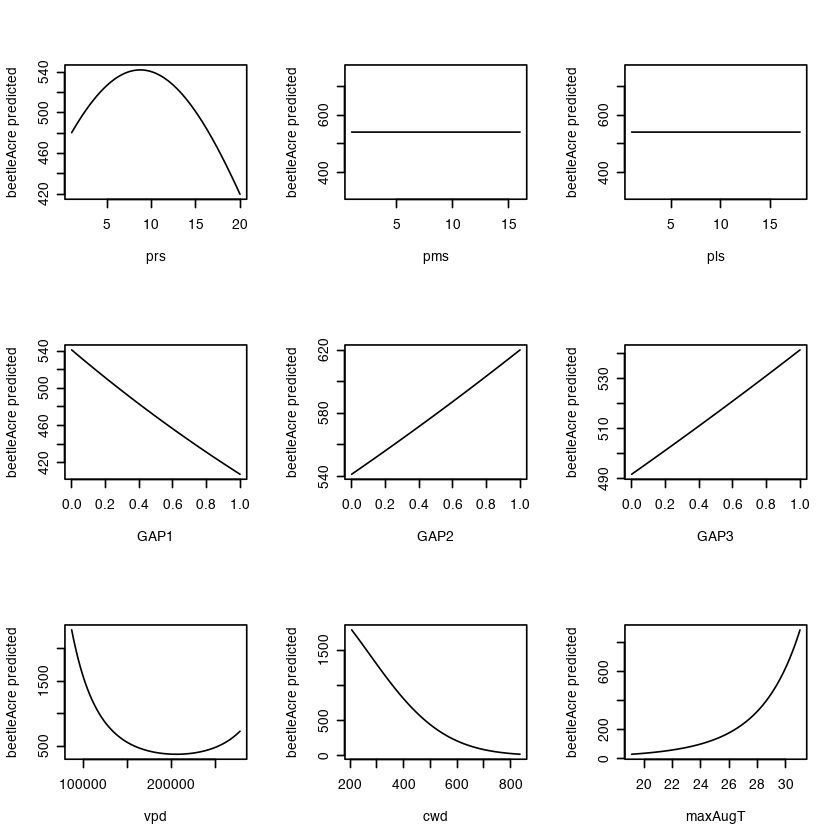

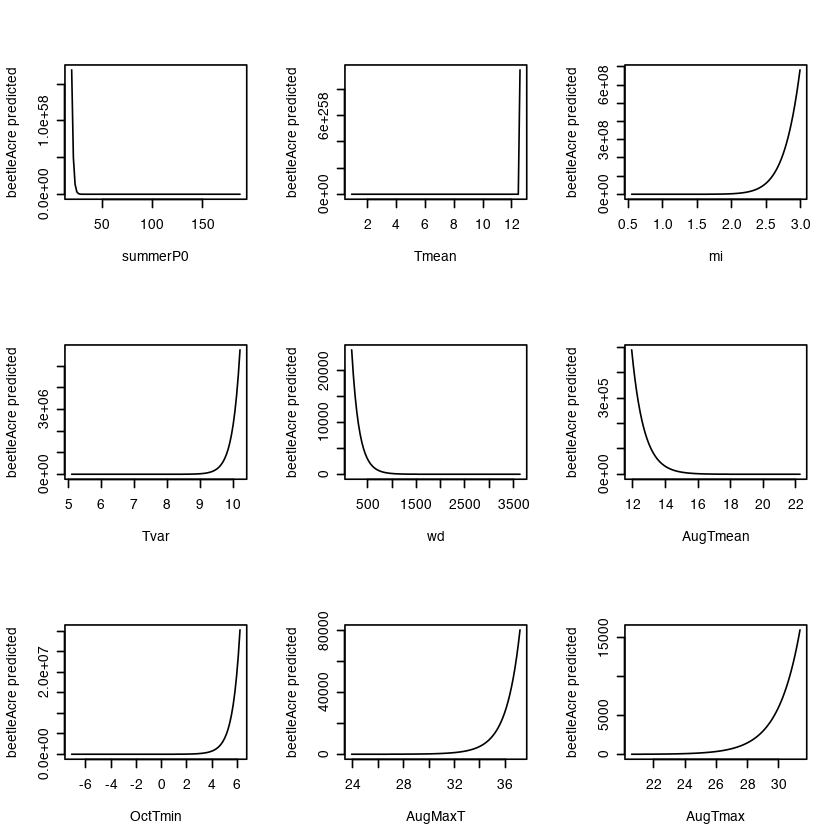

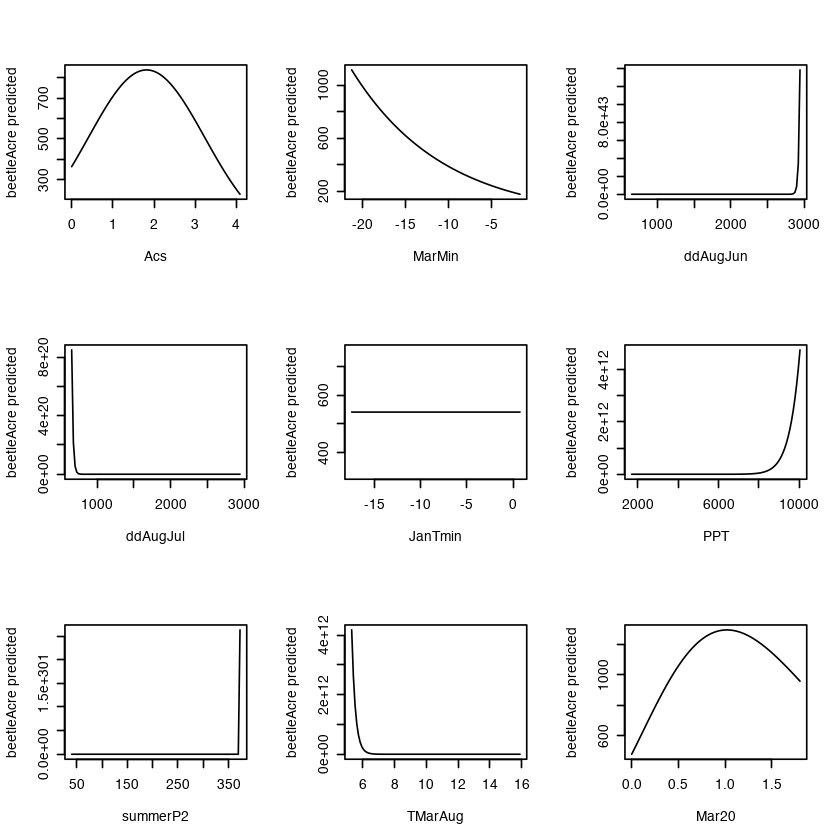

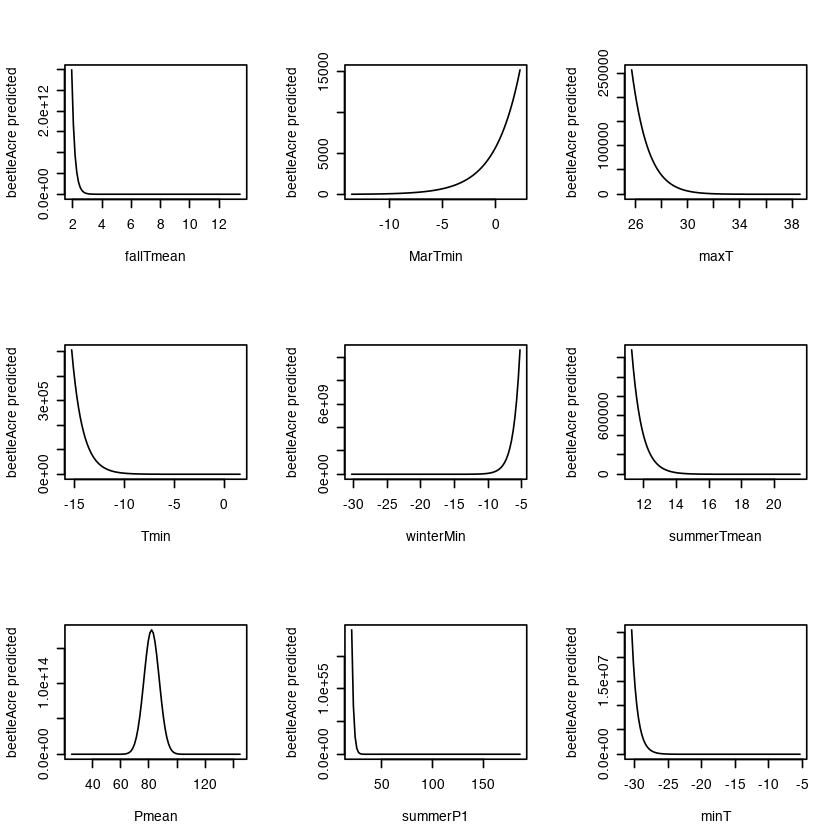

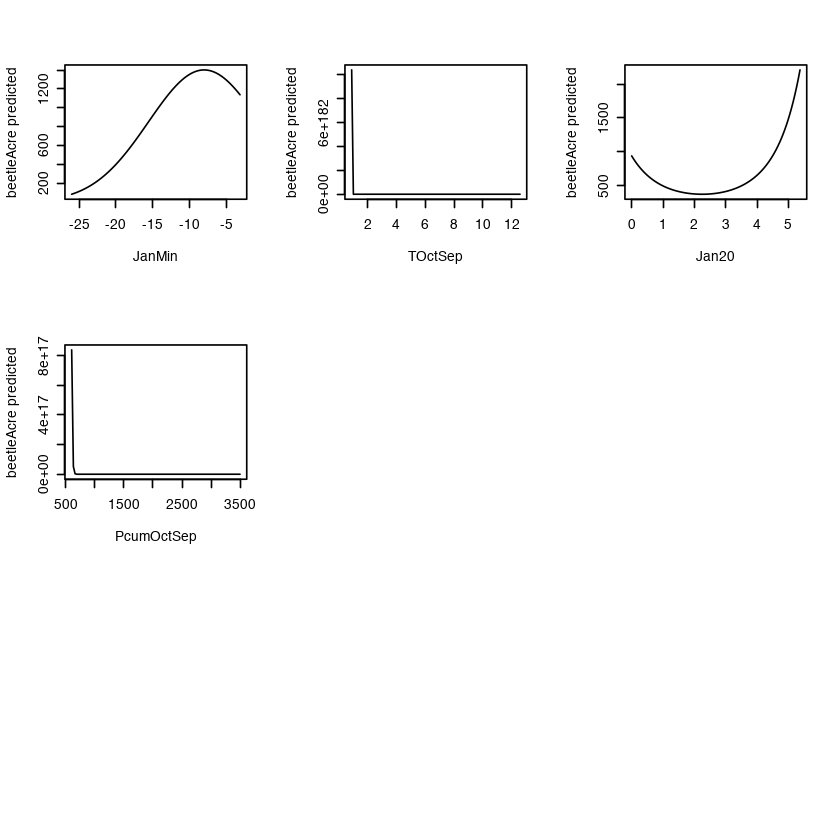

In [33]:
m <- data.frame(matrix(, nrow = 100, ncol = 18))
colnames(m) <- c('mStdAge', 'mStdAge.y', 'density', 'density.y', 'vcc', 'vcc.y', 
                 'mfri', 'mfri.y', 'prs', 'prs.y', 'GAP1', 'GAP1.y','GAP3', 'GAP3.y')
par(mfrow=c(3, 3))
for (field in names(med.df)) {
  if (!(field %in% c('preds', 'beetleAcres'))) {
    test.df <- med.df
    xmin <- quantile(data[, field], probs=0.025)
    xmax <- quantile(data[, field], probs=0.975)
    test.df[, field] <- seq(xmin, xmax, length=100)
    preds <- exp(predict(mod.r, newdata=test.df))
    i <- 1
    if(field %in% c('mStdAge', 'density', 'vcc', 'mfri', 'prs', 'GAP1', 'GAP3')){
        m[,field] <- test.df[, field]
        m[,paste0(field,'.y')] <- preds
        i <- i + 1
    }
    plot(preds ~ test.df[, field], 
         type='l', 
         xlab=field, 
         ylab='beetleAcre predicted')
  }
}
write.csv(m, sprintf('%s/plot_2D_forestdata.csv', DATA), row.names=FALSE)

In [10]:
sq_terms <- c('lon', 'lat', 'etopo1', 'density', 'mStdAge', 'density', 'prs', 'vpd', 'cwd', 'maxAugT', 'summerP0', 
              'Tmean', 'mi','Tvar', 'wd', 'OctTmin', 'AugMaxT', 'Acs', 'ddAugJun', 'ddAugJul', 
              'PPT', 'summerP2', 'Pmean', 'summerP1', 'JanMin', 'Jan20', 'PcumOctSep')
exp_terms <- c('Tmean', 'TMarAug', 'fallTmean')
log_terms <- c('vcc', 'mfri')
logp1_terms <- 'Mar20'

for(var in sq_terms){
    varnm <- paste0(var, '_sq')
    data[,varnm] <- (data[,var])^2
    cat(sprintf('Calculated %s in a squared term...\n', var))
}

for(var in exp_terms){
    varnm <- paste0(var, '_exp')
    data[,varnm] <- exp(data[,var])
    cat(sprintf('Calculated %s in a exponential term...\n', var))
}

for(var in log_terms){
    varnm <- paste0(var, '_log')
    data[,varnm] <- log(data[,var])
    cat(sprintf('Calculated %s in a squared term...\n', var))
}

for(var in logp1_terms){
    varnm <- paste0(var, '_logp1')
    data[,varnm] <- log(data[,var]+1)
    cat(sprintf('Calculated %s in a logarithm term...\n', var))
}

Calculated lon in a squared term...
Calculated lat in a squared term...
Calculated etopo1 in a squared term...
Calculated density in a squared term...
Calculated mStdAge in a squared term...
Calculated density in a squared term...
Calculated prs in a squared term...
Calculated vpd in a squared term...
Calculated cwd in a squared term...
Calculated maxAugT in a squared term...
Calculated summerP0 in a squared term...
Calculated Tmean in a squared term...
Calculated mi in a squared term...
Calculated Tvar in a squared term...
Calculated wd in a squared term...
Calculated OctTmin in a squared term...
Calculated AugMaxT in a squared term...
Calculated Acs in a squared term...
Calculated ddAugJun in a squared term...
Calculated ddAugJul in a squared term...
Calculated PPT in a squared term...
Calculated summerP2 in a squared term...
Calculated Pmean in a squared term...
Calculated summerP1 in a squared term...
Calculated JanMin in a squared term...
Calculated Jan20 in a squared term...
Calc

In [11]:
selected.vars <- c('lon', 'lat', 'etopo1', 'mStdAge', 'density', 'mfri', 'prs', 'GAP1', 'GAP3', 'vpd', 'cwd',
                   'summerP0', 'Tmean', 'mi', 'Tvar', 'wd', 'AugTmean', 'OctTmin', 'AugTmax', 'Acs',
                   'MarMin', 'dAugJun', 'ddAugJul', 'PPT', 'summerP2', 'TMarAug', 'Mar20', 'fallTmean', 
                   'MarTmin', 'Tmin', 'winterMin', 'summerTmean', 'Pmean', 'minT', 'TOctSep', 'Jan20', 
                   'PcumOctSep', paste0(sq_terms, '_sq'), paste0(exp_terms, '_exp'), paste0(log_terms, '_log'),
                   paste0(logp1_terms, '_logp1'))
predictors <- data[ , (names(data) %in% selected.vars)]
predictors <- scale(predictors)
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- log(df$beetleAcres)

In [12]:
mod <- lm(beetleAcres ~ ., data=df)

In [13]:
mod.r <- step(mod, trace=0)

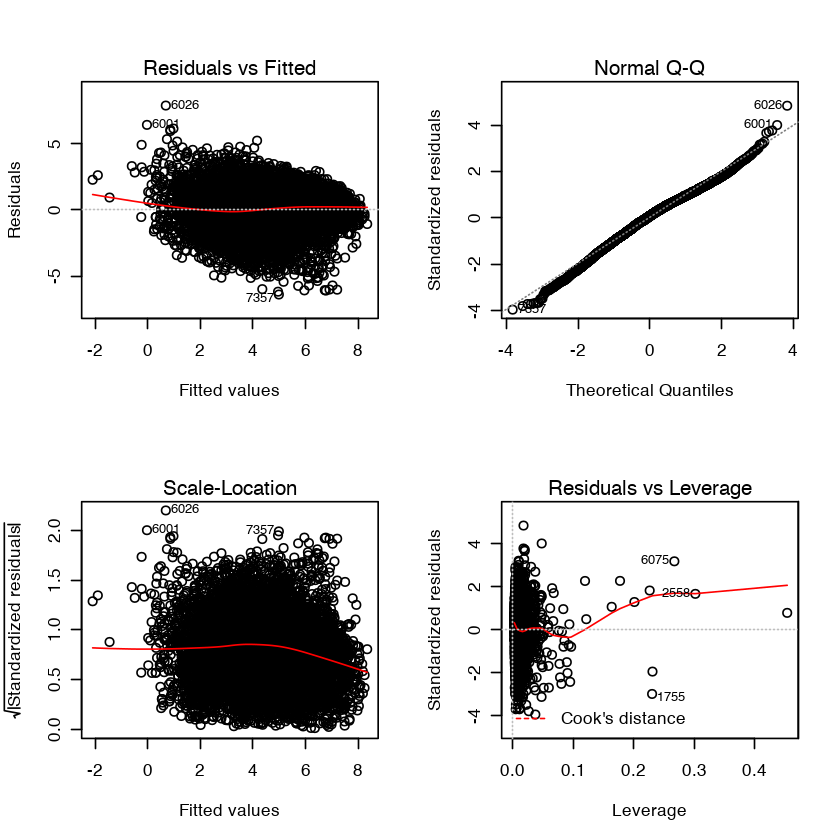

In [14]:
par(mfrow=c(2, 2))
plot(mod.r)

In [15]:
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    mfri + prs + GAP1 + GAP3 + vpd + summerP0 + Tmean + mi + 
    Tvar + wd + AugTmean + OctTmin + AugTmax + Acs + MarMin + 
    PPT + summerP2 + TMarAug + Mar20 + fallTmean + MarTmin + 
    Tmin + winterMin + summerTmean + Pmean + minT + TOctSep + 
    Jan20 + PcumOctSep + lon_sq + lat_sq + etopo1_sq + density_sq + 
    mStdAge_sq + prs_sq + vpd_sq + cwd_sq + maxAugT_sq + summerP0_sq + 
    Tmean_sq + mi_sq + Tvar_sq + wd_sq + OctTmin_sq + AugMaxT_sq + 
    Acs_sq + ddAugJun_sq + ddAugJul_sq + PPT_sq + summerP2_sq + 
    Pmean_sq + summerP1_sq + JanMin_sq + Jan20_sq + PcumOctSep_sq + 
    Tmean_exp + TMarAug_exp + fallTmean_exp + vcc_log + mfri_log + 
    Mar20_logp1, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3705 -1.0439  0.1327  1.1450  7.8672 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.41981    0.01879 235.200  < 2e-16 ***
lon         

In [16]:
sort(abs(mod.r$coefficients))

GAP3       vcc_log          GAP1    mStdAge_sq       mStdAge 
   0.03591352    0.05945162    0.10064598    0.15069409    0.18141248 
         mfri      mfri_log           prs    density_sq        prs_sq 
   0.18398188    0.19343806    0.23793933    0.26324685    0.29676742 
  TMarAug_exp        MarMin       density    OctTmin_sq    AugMaxT_sq 
   0.29829422    0.41045452    0.59589052    0.62458076    0.63718089 
fallTmean_exp    maxAugT_sq     Tmean_exp           Acs         Jan20 
   0.69256198    0.76497493    0.83958089    0.84214566    0.97001636 
       Acs_sq      Tmean_sq        cwd_sq     etopo1_sq       MarTmin 
   1.02353187    1.04195277    1.20405975    1.28311369    1.36272613 
     Jan20_sq         Mar20         wd_sq     JanMin_sq   Mar20_logp1 
   1.36931923    1.41820419    1.57865298    1.63085786    1.69877498 
       vpd_sq       AugTmax           vpd        etopo1         mi_sq 
   2.00044294    2.16378441    2.31817449    2.43604653    2.58231064 
         Tmin       Tvar_sq      AugTmean       OctTmin   (Intercept) 
   3.23440651    3.29945739    3.42802736    4.29165850    4.41981230 
       PPT_sq            wd   summerTmean     winterMin            mi 
   5.22167694    5.43650558    6.12398868    6.67670391    6.73369434 
         minT           lat        lat_sq      summerP2      summerP0 
   8.48830282    8.52465160    9.57403338   10.38175177   10.50978548 
         Tvar       TMarAug     fallTmean           PPT           lon 
  11.10488667   12.04305068   14.50209473   14.75559293   17.05742505 
       lon_sq   ddAugJul_sq   ddAugJun_sq         Pmean    PcumOctSep 
  18.36936659   68.38544754   69.46051586   70.37532640   87.37698182 
     Pmean_sq PcumOctSep_sq   summerP0_sq   summerP1_sq       TOctSep 
  88.08636764   95.15521180  119.26972709  121.00493817  227.47606878 
  summerP2_sq         Tmean 
 239.98427143  261.29140178

In [17]:
df <- data.frame(beetleAcres=data[,'beetleAcres'], predictors)
df$beetleAcres <- (df$beetleAcres)^0.05
mod <- lm(beetleAcres ~ ., data=df)
mod.r <- step(mod, trace=0)
summary(mod.r)


Call:
lm(formula = beetleAcres ~ lon + lat + etopo1 + mStdAge + density + 
    mfri + prs + GAP1 + GAP3 + vpd + summerP0 + Tmean + mi + 
    Tvar + wd + AugTmean + OctTmin + AugTmax + Acs + MarMin + 
    PPT + summerP2 + TMarAug + Mar20 + fallTmean + MarTmin + 
    Tmin + winterMin + summerTmean + Pmean + minT + TOctSep + 
    Jan20 + PcumOctSep + lon_sq + lat_sq + etopo1_sq + density_sq + 
    mStdAge_sq + prs_sq + vpd_sq + cwd_sq + maxAugT_sq + summerP0_sq + 
    Tmean_sq + mi_sq + Tvar_sq + wd_sq + OctTmin_sq + AugMaxT_sq + 
    Acs_sq + ddAugJun_sq + ddAugJul_sq + PPT_sq + summerP2_sq + 
    Pmean_sq + summerP1_sq + JanMin_sq + Jan20_sq + PcumOctSep_sq + 
    Tmean_exp + TMarAug_exp + fallTmean_exp + vcc_log + mfri_log + 
    Mar20_logp1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.36996 -0.06646  0.00511  0.07080  0.50218 

Coefficients:
                Estimate Std. Error  t value Pr(>|t|)    
(Intercept)     1.255548   0.001157 1085.339  < 2e-16 ***


In [18]:
sort(abs(mod.r$coefficients))

GAP3       vcc_log          GAP1    mStdAge_sq       mStdAge 
  0.002369357   0.003590433   0.006936181   0.009814710   0.011738188 
         mfri      mfri_log           prs    density_sq   TMarAug_exp 
  0.012906120   0.013242554   0.016415076   0.016773933   0.019173633 
       prs_sq        MarMin    OctTmin_sq       density    AugMaxT_sq 
  0.020047756   0.027972883   0.037051630   0.037923564   0.039411089 
fallTmean_exp    maxAugT_sq     Tmean_exp      Tmean_sq           Acs 
  0.041659074   0.048909575   0.051295667   0.057722827   0.058520893 
       Acs_sq         Jan20        cwd_sq     etopo1_sq       MarTmin 
  0.067772209   0.070233231   0.076458131   0.079030838   0.087783692 
     Jan20_sq         Mar20         wd_sq     JanMin_sq   Mar20_logp1 
  0.090638978   0.092775876   0.098394385   0.099031407   0.112715198 
       vpd_sq       AugTmax           vpd        etopo1         mi_sq 
  0.126712738   0.141246295   0.146433623   0.150904160   0.161781564 
      Tvar_sq          Tmin      AugTmean       OctTmin        PPT_sq 
  0.195408923   0.197283236   0.231285180   0.274264781   0.275734319 
           wd   summerTmean            mi     winterMin           lat 
  0.336619238   0.360945417   0.417653082   0.440295220   0.530389409 
         minT        lat_sq      summerP2      summerP0          Tvar 
  0.552263922   0.600376431   0.605970660   0.614767414   0.672278175 
      TMarAug           PPT     fallTmean           lon        lon_sq 
  0.735497960   0.867136764   0.900565854   1.005687079   1.090499376 
  (Intercept)   ddAugJul_sq   ddAugJun_sq         Pmean      Pmean_sq 
  1.255548117   3.809320640   3.876823807   4.560148709   5.477064357 
   PcumOctSep PcumOctSep_sq   summerP0_sq   summerP1_sq       TOctSep 
  5.569552869   5.868954338   9.221121507   9.316724904  14.313694978 
        Tmean   summerP2_sq 
 16.374947689  18.517756116

In [19]:
sort(mod.r$coefficients)

TOctSep   summerP1_sq   summerP0_sq    PcumOctSep      Pmean_sq 
-14.313694978  -9.316724904  -9.221121507  -5.569552869  -5.477064357 
  ddAugJul_sq     fallTmean       TMarAug      summerP0        lat_sq 
 -3.809320640  -0.900565854  -0.735497960  -0.614767414  -0.600376431 
         minT   summerTmean            wd        PPT_sq      AugTmean 
 -0.552263922  -0.360945417  -0.336619238  -0.275734319  -0.231285180 
         Tmin       Tvar_sq         mi_sq           vpd     JanMin_sq 
 -0.197283236  -0.195408923  -0.161781564  -0.146433623  -0.099031407 
        Mar20     etopo1_sq        cwd_sq         Jan20        Acs_sq 
 -0.092775876  -0.079030838  -0.076458131  -0.070233231  -0.067772209 
     Tmean_sq fallTmean_exp    AugMaxT_sq        MarMin        prs_sq 
 -0.057722827  -0.041659074  -0.039411089  -0.027972883  -0.020047756 
  TMarAug_exp    density_sq      mfri_log    mStdAge_sq          GAP1 
 -0.019173633  -0.016773933  -0.013242554  -0.009814710  -0.006936181 
         GAP3       vcc_log       mStdAge          mfri           prs 
  0.002369357   0.003590433   0.011738188   0.012906120   0.016415076 
   OctTmin_sq       density    maxAugT_sq     Tmean_exp           Acs 
  0.037051630   0.037923564   0.048909575   0.051295667   0.058520893 
      MarTmin      Jan20_sq         wd_sq   Mar20_logp1        vpd_sq 
  0.087783692   0.090638978   0.098394385   0.112715198   0.126712738 
      AugTmax        etopo1       OctTmin            mi     winterMin 
  0.141246295   0.150904160   0.274264781   0.417653082   0.440295220 
          lat      summerP2          Tvar           PPT           lon 
  0.530389409   0.605970660   0.672278175   0.867136764   1.005687079 
       lon_sq   (Intercept)   ddAugJun_sq         Pmean PcumOctSep_sq 
  1.090499376   1.255548117   3.876823807   4.560148709   5.868954338 
        Tmean   summerP2_sq 
 16.374947689  18.517756116

In [20]:
write.csv(df, sprintf('%s/mpb10km_data_wo_FIA_scaled.csv', DATA), row.names=FALSE)